<a href="https://colab.research.google.com/github/Rithunrajendran/Retail-Sales-Prediction_ML-Regression/blob/main/Team_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name    -  Retail Sales Prediction**



##### **Project Type**    - Regression Analysis
##### **Contribution**    -Team
##### **Team Member 1** - Rithun Rajendran M.K
##### **Team Member 2** - Affan Ahmad Abdul Wahid
##### **Team Member 3** - Prajwal Bharadwaj
##### **Team Member 4** - Shreyash Kumar
##### **Team Member 5** -Md Ashique Ali

# **Project Summary -**

Retail Sales Prediction is done by group of 5 members.All the members have equal contribution in this projectIn this project we first got two csv files,Rossmann Stores Data.csv and store.csv.As we downloaded the csv files from the almabetter dashboard we encoded the file in the colab notebook by mounting the drive.We named both the csv files as sales and stores and included the csv file in it.Then we checked the missing/null  values  in both the dataset and we applied certain method to solve it.After that we merged both the dataset and now we have a total of  1017209 rows and 18 columns.As for performing linear negression model is neccessary to convert all the columns to numeric values,so we converted it.Then we done certain visualization techniques on the dataset to find the relationship between the features. Ater that we have done the feature engineering and the data preprocessing part where we handled the  outliers using interquartile method and then we have done categorical encoding,feature manuoulation and feature selection,checked multicolinearity,Data Transformation then we splitted and trained the Machine leaning model using certain algorithms like Linear Regression,Lasso and Ridge Regression,Random Forest,Decision Tree,Elasticnet,XGBoost and also done Gridsearch cross validation in some of them and we got reaaly got accurracy with the best of 97%.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime

import warnings    
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
sales_df = pd.read_csv("/content/drive/MyDrive/capstone project 2/Rossmann Stores Data.csv")
stores_df = pd.read_csv("/content/drive/MyDrive/capstone project 2/store.csv")

### Dataset First View

In [ ]:
# viewing store Dataset
stores_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
#Viewing sales dataset
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### Dataset Rows & Columns count

In [ ]:
#Rows & Columns of stores dataset
stores_df.shape

(1115, 10)

In [ ]:
# Rows & Columns of sales dataset
sales_df.shape

(1017209, 9)

### Dataset Information

In [ ]:
#info about the sales dataset
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


There is 1017209 rows and 9 columns in the sales dataset.There seems to be no null values in it. It has integer, datetime and object as data types. 

In [ ]:
#info about the stores
stores_df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


There are 1115 rows and 10 columns. There are missing values in certain columns and it is important to impute them with appropriate values in order to get good results later on.



#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(sales_df[sales_df.duplicated()])

0

In [ ]:
# Dataset Duplicate Value Count
len(stores_df[stores_df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count of sales dataset
print(sales_df.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


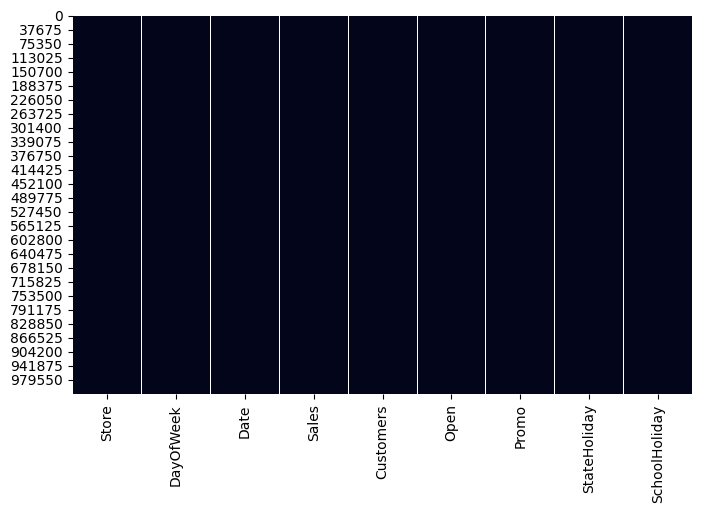

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(sales_df.isnull(), cbar=False)

### What did you know about your dataset?

There is no missing/null values in the sales dataset.

In [ ]:
# Missing Values/Null Values Count of sales dataset
print(stores_df.isnull().sum())

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


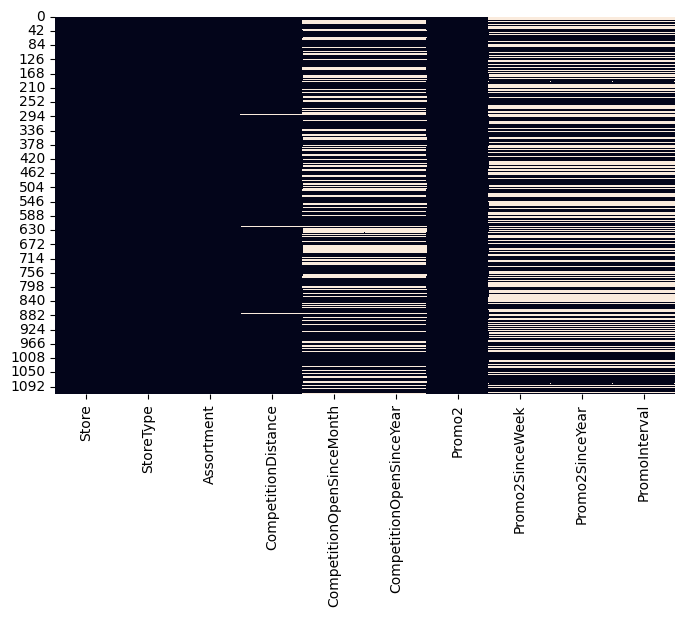

In [ ]:
# Checking Null Value by plotting Heatmap
sns.heatmap(stores_df.isnull(), cbar=False)

Out of 1115 entries there are missing values for the columns:

CompetitionDistance- distance in meters to the nearest competitor store, the distribution plot would give us an idea about the distances at which generally the stores are opened and we would impute the values accordingly.

CompetitionOpenSinceMonth- gives the approximate month of the time the nearest competitor was opened, mode of the column would tell us the most occuring month

CompetitionOpenSinceYear- gives the approximate year of the time the nearest competitor was opened, mode of the column would tell us the most occuring month

Promo2SinceWeek, Promo2SinceYear and PromoInterval are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0.



Text(0.5, 0, 'Competition Distance Distribution Plot')

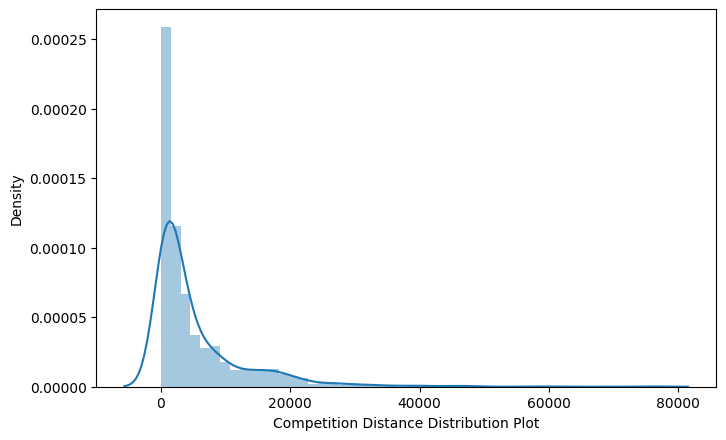

In [ ]:
#Distribution plot of competition distance
sns.distplot(x=stores_df['CompetitionDistance'], hist = True)
plt.xlabel('Competition Distance Distribution Plot')

It seems like most of the values of the CompetitionDistance are towards the left and the distribution is skewed on the right. Median is more robust to outlier effect.



In [ ]:
# filling competition distance with the median value
stores_df['CompetitionDistance'].fillna(stores_df['CompetitionDistance'].median(), inplace = True)

In [ ]:
# filling competition open since month and year with the most occuring values of the columns i.e modes of those columns
stores_df['CompetitionOpenSinceMonth'].fillna(stores_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
stores_df['CompetitionOpenSinceYear'].fillna(stores_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [ ]:
# imputing the nan values of promo2 related columns with 0
stores_df['Promo2SinceWeek'].fillna(value=0,inplace=True)
stores_df['Promo2SinceYear'].fillna(value=0,inplace=True)
stores_df['PromoInterval'].fillna(value=0,inplace=True)

In [ ]:
#check
stores_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

**Merging the two Datasets**

In [ ]:
#merge the sales dataset on stores dataset
df = sales_df.merge(right=stores_df, on="Store", how="left")

In [ ]:
#view of merged dataset
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [ ]:
#shape of the dataframe
df.shape

(1017209, 18)

## What did you know about your dataset?

The dataset given is a dataset from Rossmann store, and we have to analyse the daily sales for upto 6 weeks in advance.Here we have 2 dataset ,sales and store dataset.In the store dataset there is missing values so we have put mean,mode or median to make the dataset balanced,after merging it the total number of rows is 1017209 and 18 columns.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1017209,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209.0
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,4.0
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,0.0
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN,551627,537445,NaN,NaN,NaN,NaN,NaN,NaN,508031.0
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01,NaN,NaN,5.422021e+03,7.787777e+00,2.010060e+03,5.005638e-01,1.164767e+01,1.007011e+03,NaN
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01,NaN,NaN,7.706918e+03,2.778755e+00,5.340757e+00,4.999999e-01,1.532393e+01,1.005877e+03,NaN
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,7.100000e+02,6.000000e+00,2.008000e+03,0.000000e+00,0.000000e+00,0.000000e+00,NaN
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.325000e+03,9.000000e+00,2.012000e+03,1.000000e+00,1.000000e+00,2.009000e+03,NaN
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00,NaN,NaN,6.880000e+03,9.000000e+00,2.013000e+03,1.000000e+00,2.200000e+01,2.012000e+03,NaN


### Variables Description 

## **Data Description**

Rossmann Stores Data.csv - historical data including Sales

store.csv - supplemental information about the stores

**Data fields**

**Id** - an Id that represents a (Store, Date) duple within the set

**Store** - a unique Id for each store

**Sales** - the turnover for any given day (Dependent Variable)

**Customers** - the number of customers on a given day

**Open** - an indicator for whether the store was open: 0 = closed, 1 = open

**StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

**SchoolHoliday **- indicates if the (Store, Date) was affected by the closure of public schools

**StoreType** - differentiates between 4 different store models: a, b, c, d

**Assortment** - describes an assortment level: a = basic, b = extra, c = extended. An assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers.

**CompetitionDistance** - distance in meters to the nearest competitor store

**CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened

**Promo** - indicates whether a store is running a promo on that day

**Promo2** - Promo2 is a continuing and consecutive promotion for some 
stores:

0 = store is not participating, 1 = store is participating

**Promo2Since[Year/Week]**  - describes the year and calendar week when the store started participating in Promo2

**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
 print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  Store is 1115 .
No. of unique values in  DayOfWeek is 7 .
No. of unique values in  Date is 942 .
No. of unique values in  Sales is 21734 .
No. of unique values in  Customers is 4086 .
No. of unique values in  Open is 2 .
No. of unique values in  Promo is 2 .
No. of unique values in  StateHoliday is 5 .
No. of unique values in  SchoolHoliday is 2 .
No. of unique values in  StoreType is 4 .
No. of unique values in  Assortment is 3 .
No. of unique values in  CompetitionDistance is 655 .
No. of unique values in  CompetitionOpenSinceMonth is 12 .
No. of unique values in  CompetitionOpenSinceYear is 23 .
No. of unique values in  Promo2 is 2 .
No. of unique values in  Promo2SinceWeek is 25 .
No. of unique values in  Promo2SinceYear is 8 .
No. of unique values in  PromoInterval is 4 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Create a copy of the current dataset and assigning to df
df_new=df.copy()

In [ ]:
df_new['StateHoliday'].values

array(['0', '0', '0', ..., 'a', 'a', 'a'], dtype=object)

In [ ]:
df_new['Assortment'].values

array(['a', 'a', 'a', ..., 'c', 'c', 'c'], dtype=object)

In [ ]:
df_new['StoreType'].values

array(['c', 'a', 'a', ..., 'a', 'a', 'd'], dtype=object)

In [ ]:
df_new['Date'].values

array(['2015-07-31', '2015-07-31', '2015-07-31', ..., '2013-01-01',
       '2013-01-01', '2013-01-01'], dtype=object)

In [ ]:
df_new['CompetitionOpenSinceYear'].values

array([2008., 2007., 2006., ..., 2013., 2013., 2013.])

In [ ]:
df_new['CompetitionOpenSinceMonth'].values

array([ 9., 11., 12., ...,  9.,  9.,  9.])

In [ ]:
df_new['CompetitionDistance'].values

array([ 1270.,   570., 14130., ...,  9260.,   870.,  5350.])

In [ ]:
df_new['Promo2SinceYear'].values

array([   0., 2010., 2011., ...,    0.,    0., 2012.])

In [ ]:
# code for changing StateHoliday dtype from object to int.
df_new.loc[df_new['StateHoliday'] == '0', 'StateHoliday'] = 0
df_new.loc[df_new['StateHoliday'] == 'a', 'StateHoliday'] = 1
df_new.loc[df_new['StateHoliday'] == 'b', 'StateHoliday'] = 2
df_new.loc[df_new['StateHoliday'] == 'c', 'StateHoliday'] = 3
df_new['StateHoliday'] = df_new['StateHoliday'].astype(int, copy=False)
print('levels :', df_new['StateHoliday'].unique(), '; data type :',df_new['StateHoliday'].dtype)

levels : [0 1 2 3] ; data type : int64


In [ ]:
# code for changing Assortment dtype from object to int.
df_new.loc[df_new['Assortment'] == 'a', 'Assortment'] = 0
df_new.loc[df_new['Assortment'] == 'b', 'Assortment'] = 1
df_new.loc[df_new['Assortment'] == 'c', 'Assortment'] = 2
df_new['Assortment'] = df_new['Assortment'].astype(int, copy=False)
print('levels :', df_new['Assortment'].unique(), '; data type :', df_new['Assortment'].dtype)

levels : [0 2 1] ; data type : int64


In [ ]:
# code for changing StoreType dtype from object to int.
df_new.loc[df_new['StoreType'] == 'a', 'StoreType'] = 0
df_new.loc[df_new['StoreType'] == 'b', 'StoreType'] = 1
df_new.loc[df_new['StoreType'] == 'c', 'StoreType'] = 2
df_new.loc[df_new['StoreType'] == 'd', 'StoreType'] = 3
df_new['StoreType'] = df_new['StoreType'].astype(int, copy=False)
print('levels :', df_new['StoreType'].unique(), '; data type :', df_new['StoreType'].dtype)

levels : [2 0 3 1] ; data type : int64


In [ ]:
# code for changing format of date from object to datetime
df_new['Date'] = pd.to_datetime(df_new['Date'], format= '%Y-%m-%d')

In [ ]:
print(df_new['Date'])

0         2015-07-31
1         2015-07-31
2         2015-07-31
3         2015-07-31
4         2015-07-31
             ...    
1017204   2013-01-01
1017205   2013-01-01
1017206   2013-01-01
1017207   2013-01-01
1017208   2013-01-01
Name: Date, Length: 1017209, dtype: datetime64[ns]


In [ ]:
df_new['CompetitionDistance']=df_new['CompetitionDistance'].astype(int)
df_new['CompetitionOpenSinceMonth']=df_new['CompetitionOpenSinceMonth'].astype(int)
df_new['CompetitionOpenSinceYear']=df_new['CompetitionOpenSinceYear'].astype(int)
df_new['Promo2SinceWeek']=df_new['Promo2SinceWeek'].astype(int)
df_new['Promo2SinceYear']=df_new['Promo2SinceYear'].astype(int)

In [ ]:
#makes seperate column for date , month and year
df_new['Year'] =  df_new['Date'].apply(lambda x : x.year)
df_new['Month'] =  df_new['Date'].apply(lambda x : x.month)
df_new['Day'] =  df_new['Date'].apply(lambda x : x.day)
     

### What all manipulations have you done and insights you found?

Here from the folllowing codes first i had checked the values of certain columns and i found it that their datatypes are not integer.To perform a linear regression problem it neccessery to convert those datatypes into integer so i have changed the datatypes of StateHoliday,Data,Assortment,StoreType,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,Promo2SinceYear,CompetitionDistance into integer type.

### **Checking datatypes of columns**

In [ ]:
df_new.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                          int64
SchoolHoliday                         int64
StoreType                             int64
Assortment                            int64
CompetitionDistance                   int64
CompetitionOpenSinceMonth             int64
CompetitionOpenSinceYear              int64
Promo2                                int64
Promo2SinceWeek                       int64
Promo2SinceYear                       int64
PromoInterval                        object
Year                                  int64
Month                                 int64
Day                                   int64
dtype: object

# ***4.Exploratory Data Analysis***

## **4.Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

In [ ]:
df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,9,2008,0,0,0,0,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,9,2009,0,0,0,0,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,4,2015,0,0,0,0,2015,7,31


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

**Our Target variable is Sales so we have to check the distrubution.**

#### **Chart - 1:Plot between sales and Competition open since year**

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

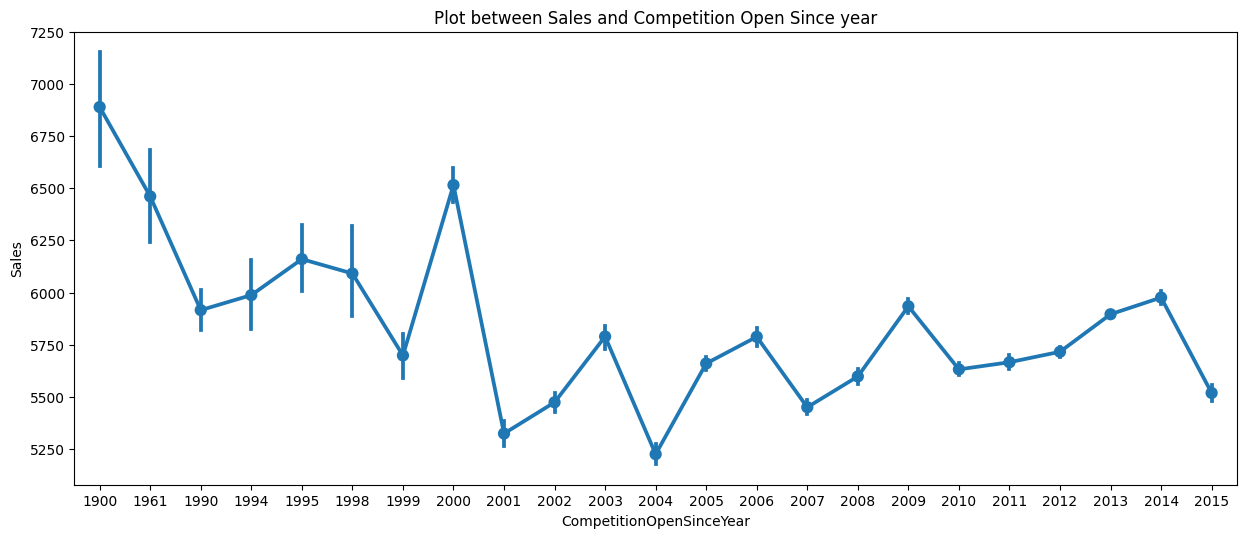

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=df_new)
plt.title('Plot between Sales and Competition Open Since year')

##### 1. Why did you pick the specific chart?

A point plot represents an estimate of central tendency for a numeric variable by the position of the dot and provides some indication of the uncertainty around that estimate using error bars. Here we have used pointplot to find the relation between sales and Competition open Since Year.

##### 2. What is/are the insight(s) found from the chart?

From the Plot we can tell that Sales are high during the year 1900, as there are very few store were operated of Rossmann so there is less competition and sales are high. But as year pass on number of stores increased that means competition also increased and this leads to decline in the sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As the graph specifically shows that during the year 1900 the sales are high and the competitions is less,but as the year goes on the competiton increases and the sales decreases.So the insights lead to negative growth in the business.

#### **Chart - 2:Plot between sales and Promo2 Since year**

Text(0.5, 1.0, 'Plot between Sales and Promo2 Since year')

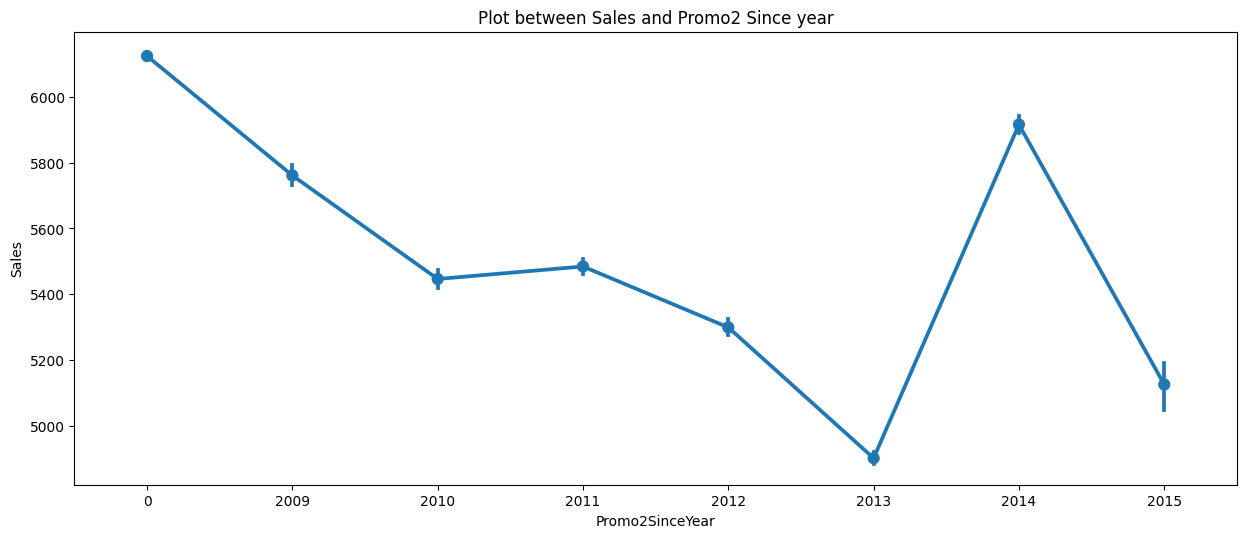

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'Promo2SinceYear', y= 'Sales', data=df_new)
plt.title('Plot between Sales and Promo2 Since year')

##### 1. Why did you pick the specific chart?


A point plot represents an estimate of central tendency for a numeric variable by the position of the dot and provides some indication of the uncertainty around that estimate using error bars. Here we have used pointplot to find the relation between sales and Promo2 Since Year.

##### 2. What is/are the insight(s) found from the chart?

Plot between Sales and promo2 since year shows that effect of sales of stores which continue their promotion. this data is available from year 2009 to 2015. Promo2 has very good effect on sales but in year 2013 sales be minimum and also in year 2012 and 2015 sales are very low.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As the graph specifically shows that during the year 2013 sales was minimum and also in year 2012 amd 2015 sales are very low.So in the 2012,2013 and 2015 the effect of promo2 has less effective on sales of these years.

#### **Chart - 3:Plot between sales and Competition open since month**

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since Month')

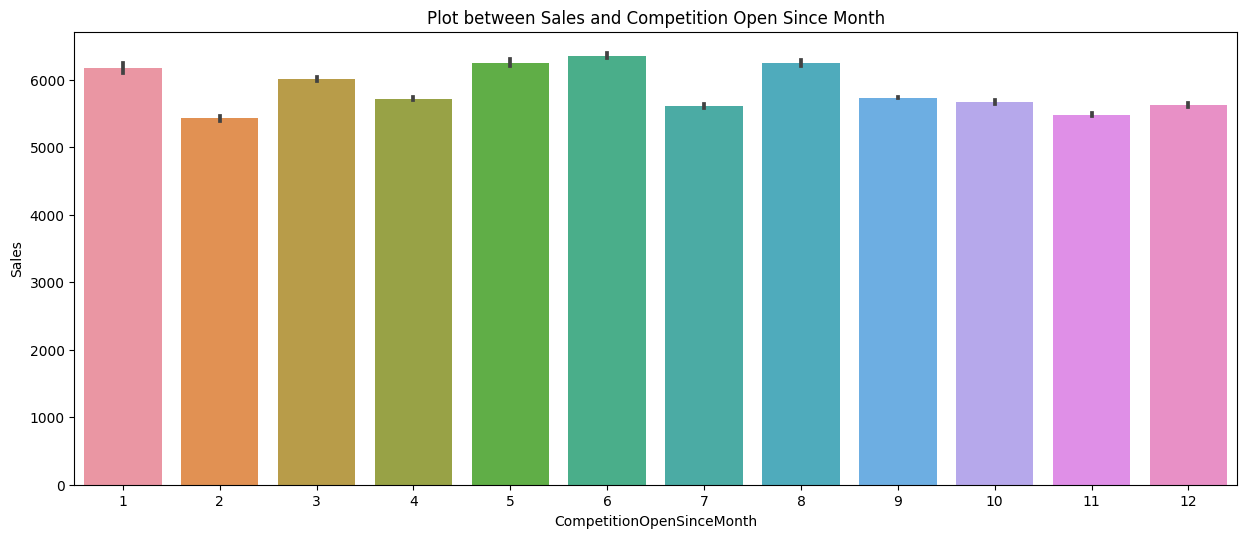

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x= 'CompetitionOpenSinceMonth', y= 'Sales', data=df_new)
plt.title('Plot between Sales and Competition Open Since Month')

##### 1. Why did you pick the specific chart?

A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represent. The bar plots can be plotted horizontally or vertically. Here we have used barplot to find the relation between sales and Competition Open Since Month

##### 2. What is/are the insight(s) found from the chart?

Plot between Competition open since month and Sales explains the sales data in each month of a year. This data shows that sales after month november increases drastically. This is very clear that in December month due to Christmas Eve and New year celebration everone is buying. So sales of Rossmann store is very high in December.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As the graph specifically shows that the sales has increased in large number during the december month. As in the month on december due to christmas eve and New year celebration everyone is buying.So this creates a postive business growth.

#### **Chart - 4:Plot between sales and Day and Week**

Text(0.5, 1.0, 'Plot between Sales and Day of Week')

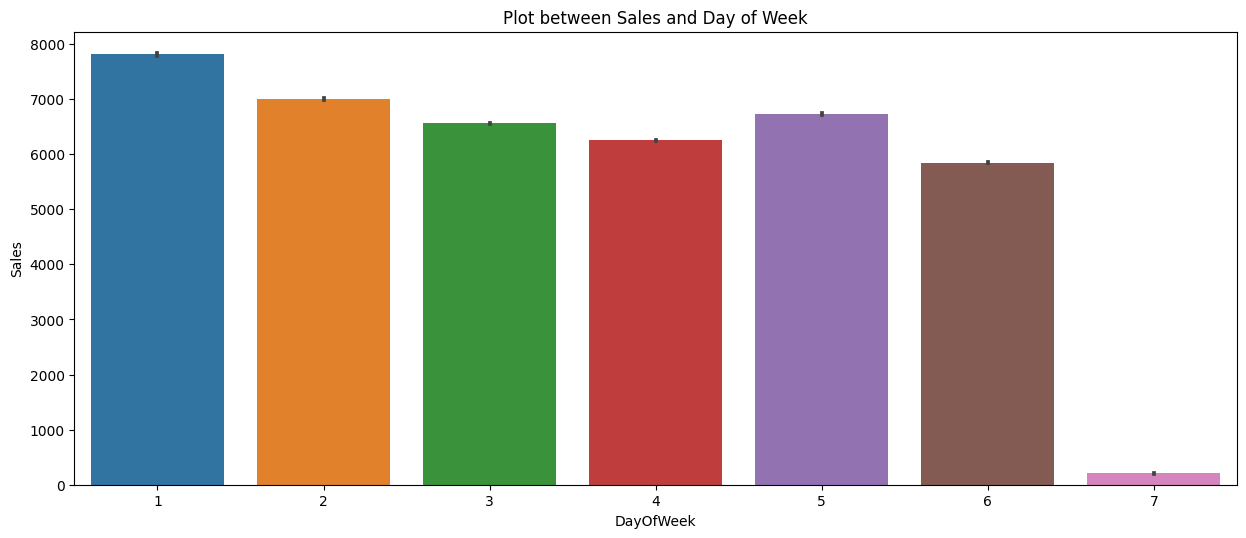

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x= 'DayOfWeek', y= 'Sales', data=df_new)
plt.title('Plot between Sales and Day of Week')

##### 1. Why did you pick the specific chart?

A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represent. The bar plots can be plotted horizontally or vertically. Here we have used barplot to find the relation between sales and Days of Week.

##### 2. What is/are the insight(s) found from the chart?

Plot between Sales and Days of week shows that maximum sales is on Monday and sales gradually decreasing to 6th day of week i.e. on Saturday. It also shows that sales on Sunday is almost near to zero as on sunday maximum stores are closed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As the graph specifically shows that during Monday stores are having the maximum sales and as passing the days the sales gradualy decreases and in sunday the sales is the least,because on sunday the stores are closed on sunday.As on sunday the sales is close to zero thus reduce the sales,this creates a negative growth in the business

#### **Chart - 5:Plot between sales and promo to determine effect of promotion on sales**

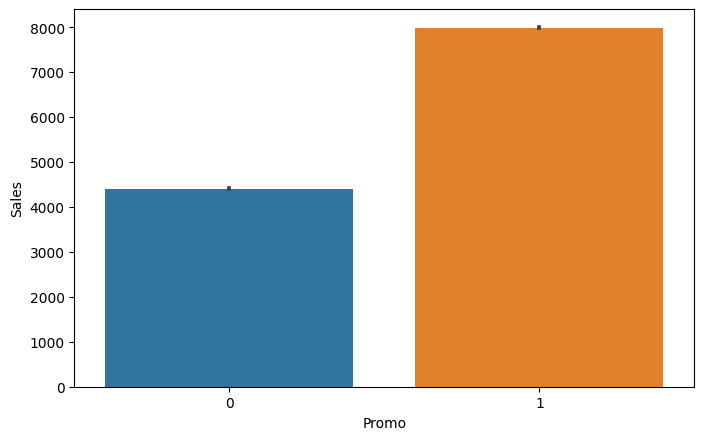

In [ ]:
promo_sales = sns.barplot(x="Promo", y="Sales", data=df_new)

##### 1. Why did you pick the specific chart?

A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represent. The bar plots can be plotted horizontally or vertically. Here we have used barplot to find the relation between sales and effect of promo on sales..

##### 2. What is/are the insight(s) found from the chart?

Barplot between promo and Sales shows the effect of promotion on Sales. Here 0 represents the store which didnt opt for promotion and 1 represents for stores who opt for promotion. Those store who took promotions has high sales as compared to stores who didnt took promotion.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As specifically shown in the barplot there is 2 values of promo (0 and 1),were represents the store which didnt opt for promotion and 1 represents for stores who opted for promotion.Here the stores who took promotions has high sales as compared to stores who didn't took promotion,from this insights we can say that it is a positive business growth.

#### **Chart - 6:Plot between sales and Stateholidays and Plot between sales and Schoolholidays**

Sales during State Holiday

0 = public holiday, 1 = Easter holiday, 2 = Christmas, 3 = None

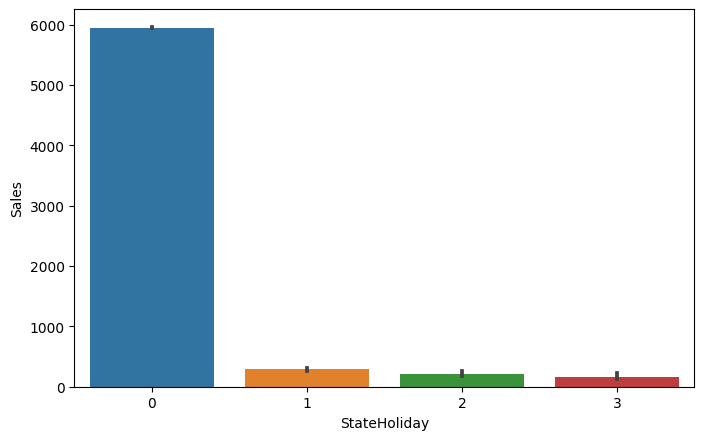

In [ ]:
Stateholiday_sales = sns.barplot(x="StateHoliday", y="Sales", data=df_new)

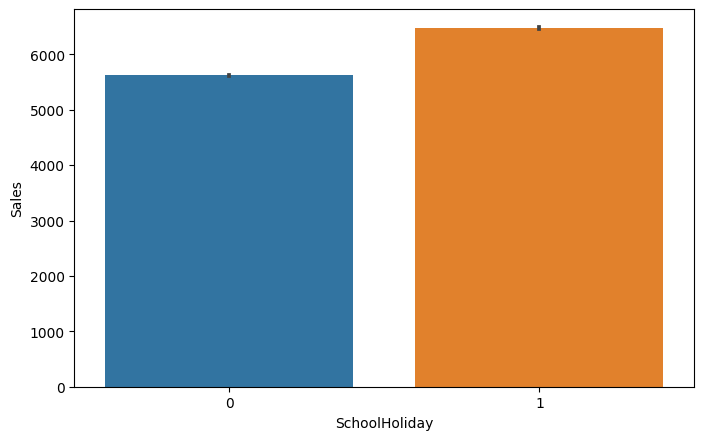

In [ ]:
schoolholiday_sales = sns.barplot(x="SchoolHoliday", y="Sales", data=df_new)

##### 1. Why did you pick the specific chart?

A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represent. The bar plots can be plotted horizontally or vertically. Here we have used barplot to find the relation between sales and Schoolholidays and sales and Stateholidays

##### 2. What is/are the insight(s) found from the chart?

We can observe that most of the stores remain closed during State and SchoolHolidays. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As most of the stores remain closed during Stateholidays and Schoolholidays,but interestingly the number of stores opened during School holidays were opened during StateHolidays.Here in the case of schoolholidays it has more sales than in normal days so in this case we have a positive growth of business.

#### **Chart - 7:Distribution of different Storetype-a,b,c,d**

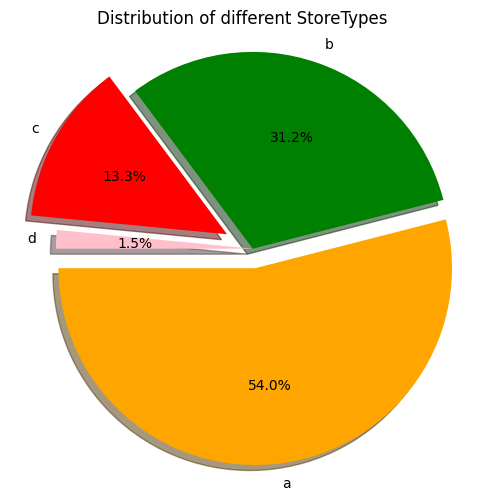

In [ ]:
labels = 'a' , 'b' , 'c' , 'd'
sizes = stores_df.StoreType.value_counts()
colors = ['orange', 'green' , 'red' , 'pink']
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

Here we have used piechart to determine the distribution of different storetypes.Here 'a' type has the maximum distribution with 54.0% and rest b=31.2%,c=13.3% and d with mimnimum of 1.5%.



#### **Chart - 8:Plot of sales according to Assortment**
An assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers.

[Text(0.5, 1.0, 'Sales according to Assortment')]

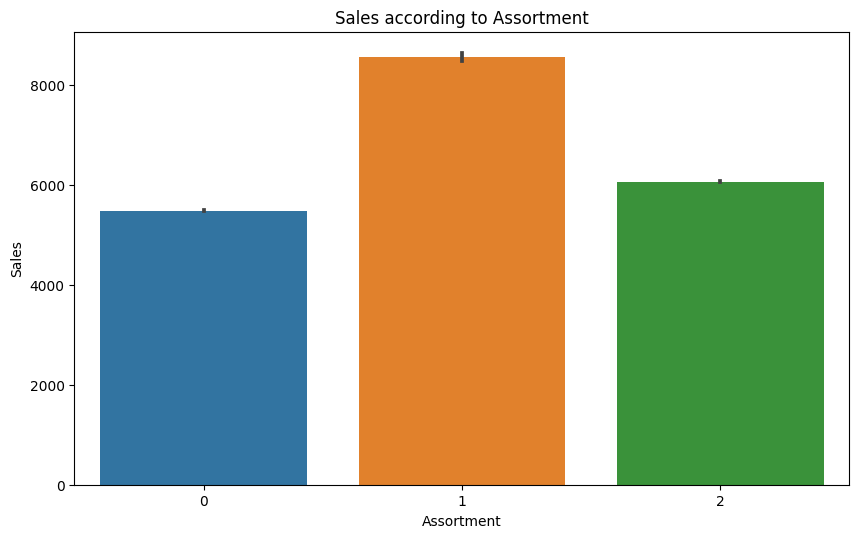

In [ ]:
#Sales according to Assortment
plt.subplots(figsize = (10,6))
sns.barplot(x= 'Assortment', y= 'Sales', data= df_new, ).set(title = 'Sales according to Assortment')

##### 1. Why did you pick the specific chart?

A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represent. The bar plots can be plotted horizontally or vertically. Here we have used barplot to find the plot between sales and assortment.

##### 2. What is/are the insight(s) found from the chart?

So from the graph we get to known the realtionship between the Assortment and sales and see that which Assortment type does give good result .Here assortment type1 has the highest sales and type2 with least.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As from the insights we can see that the Assortment type 1 has the highest sales rate so for positive business impact we can change more store to assortment type to 1 so that the sales will increase and have high profit.

#### **Chart - 9:Correlation**

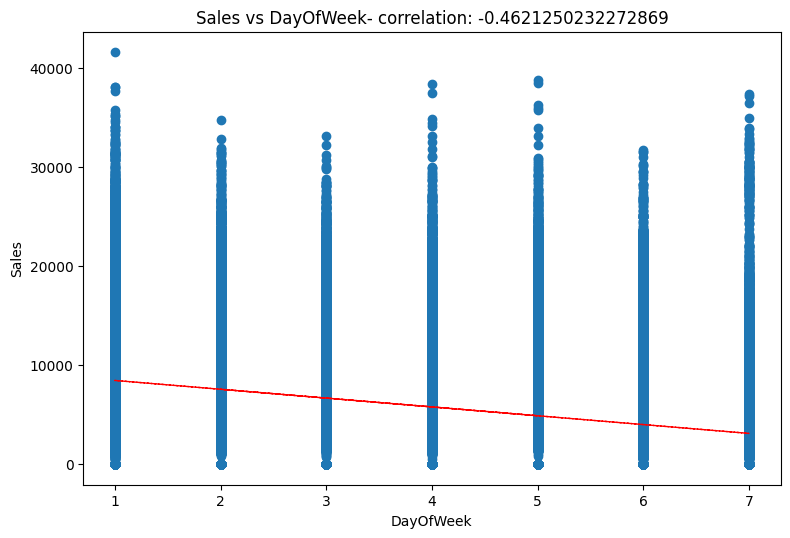

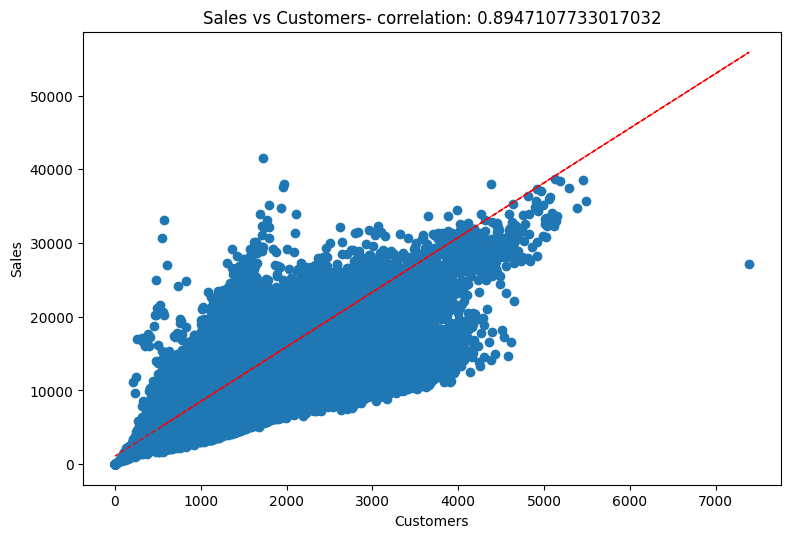

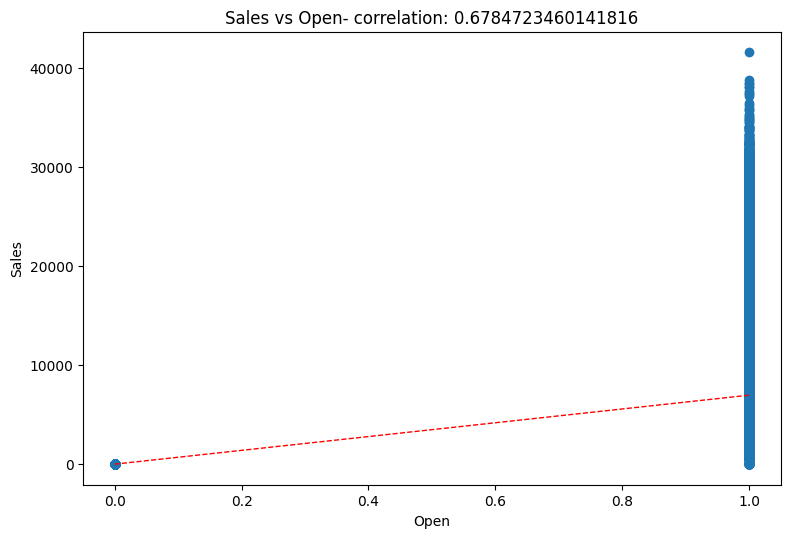

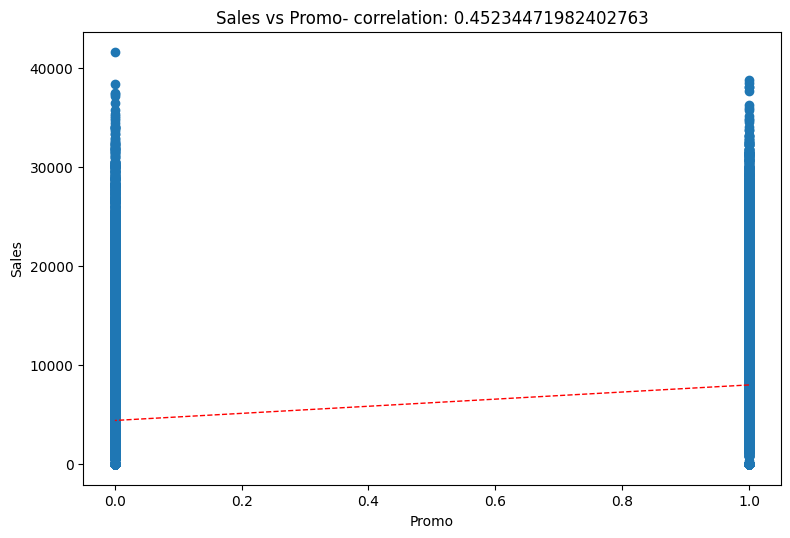

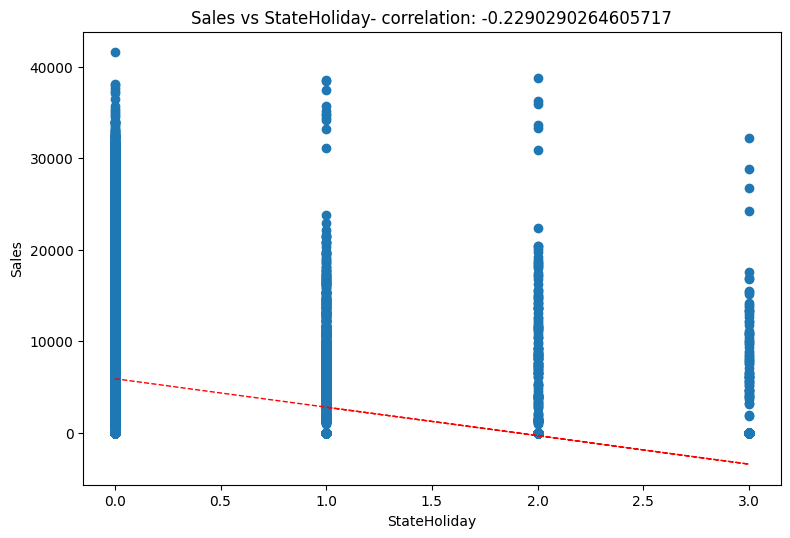

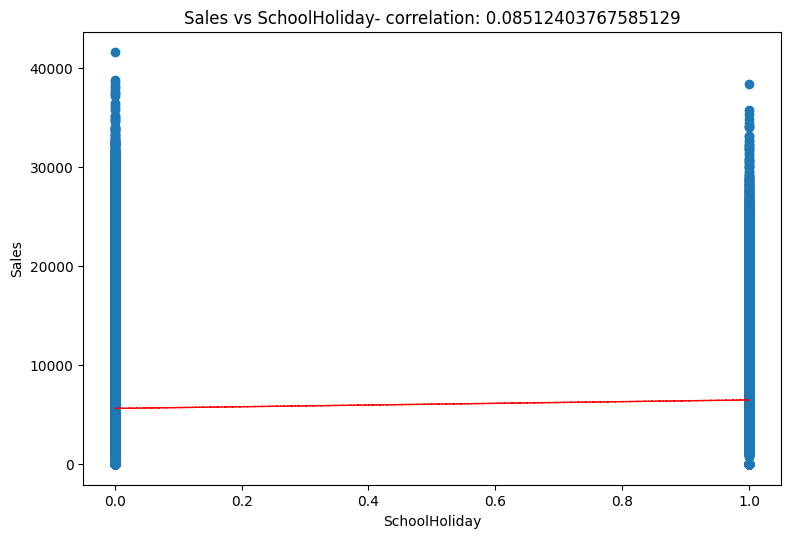

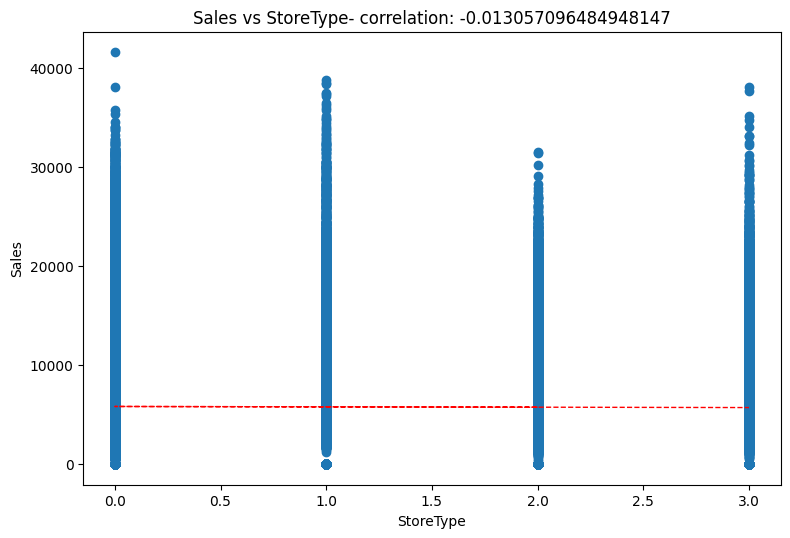

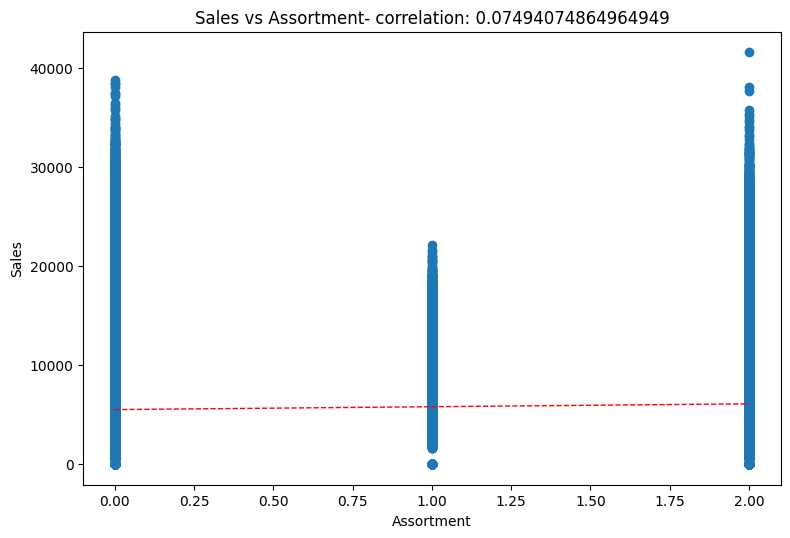

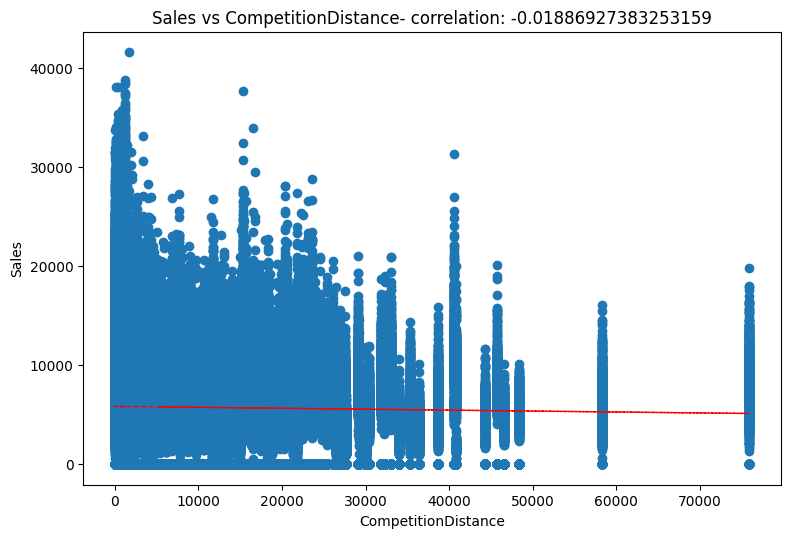

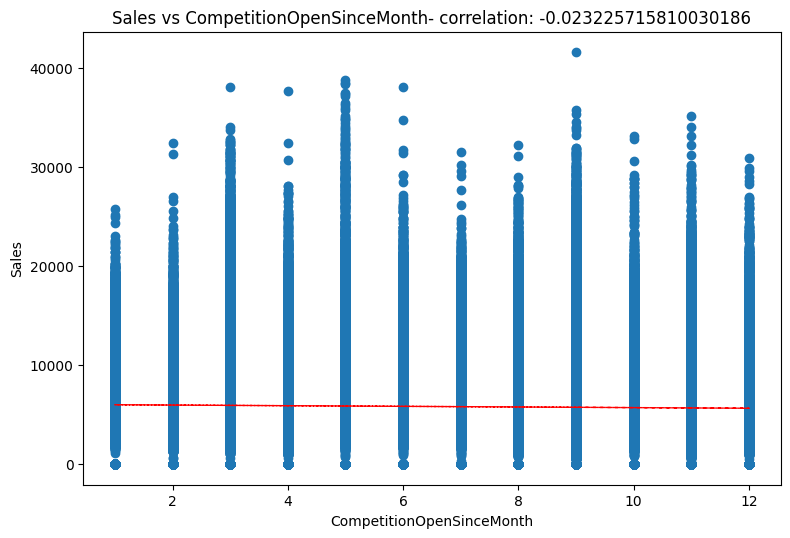

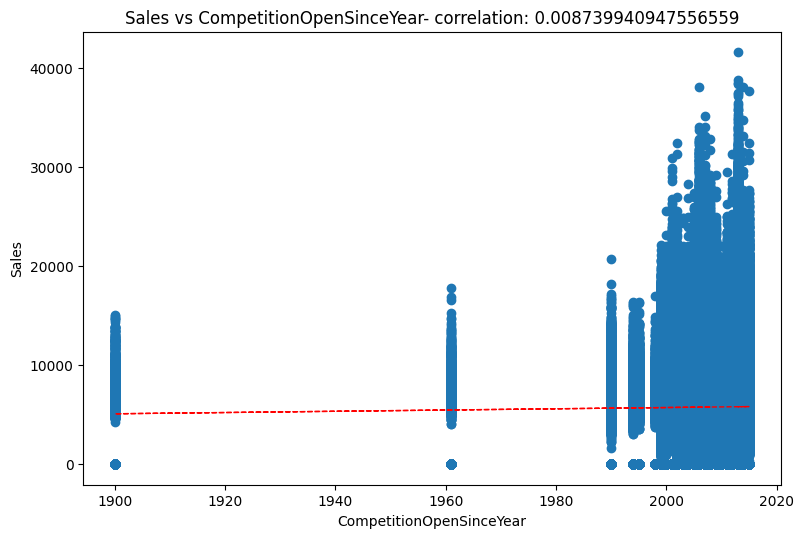

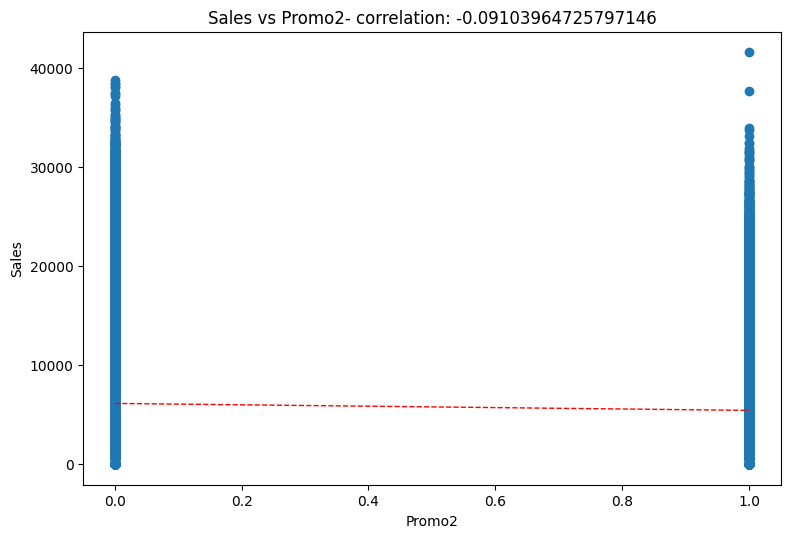

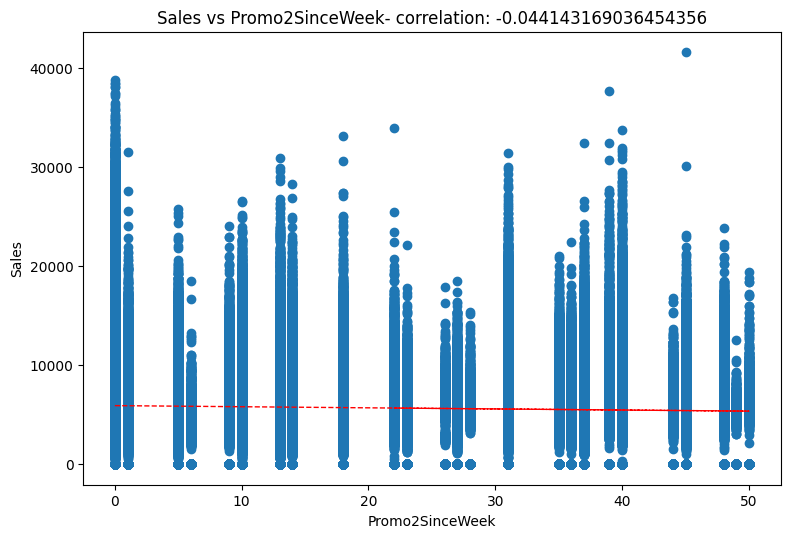

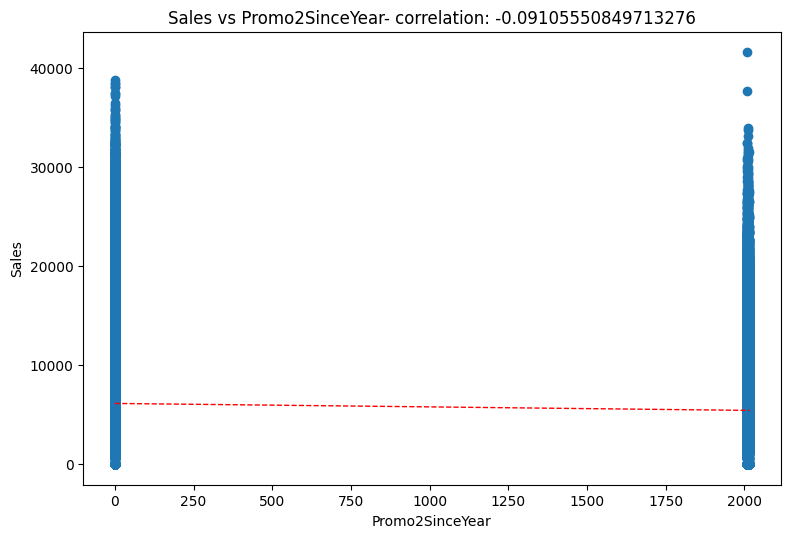

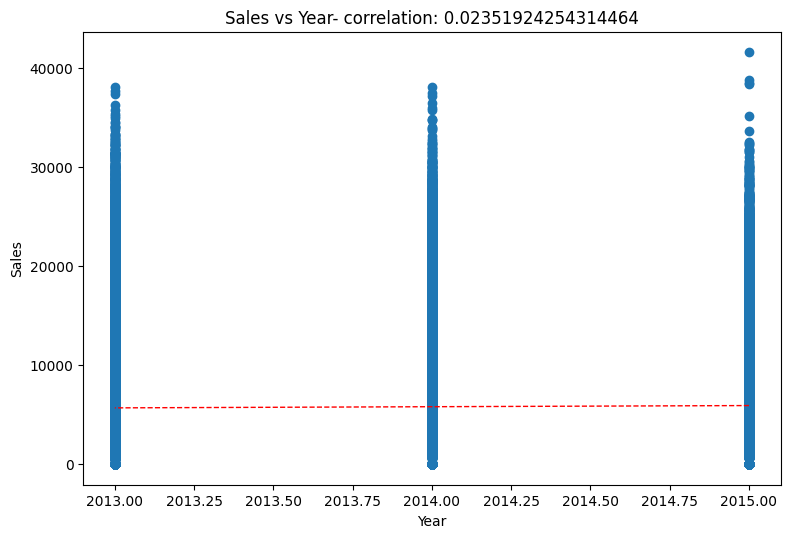

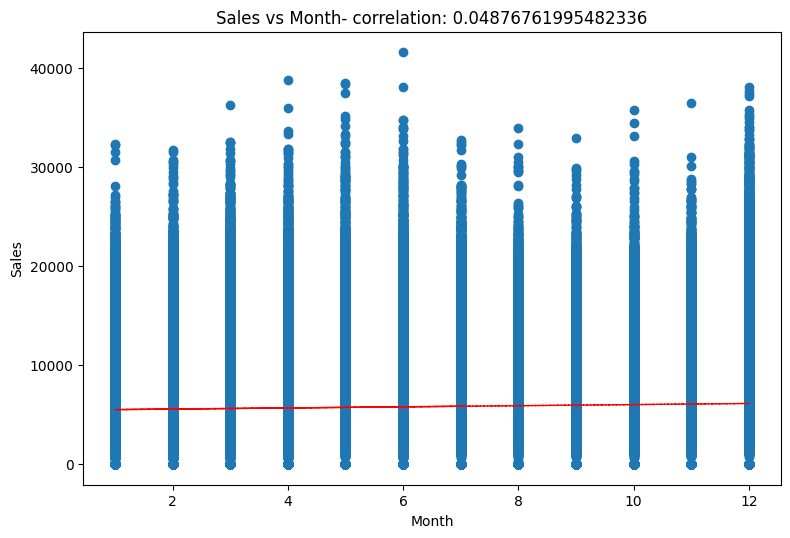

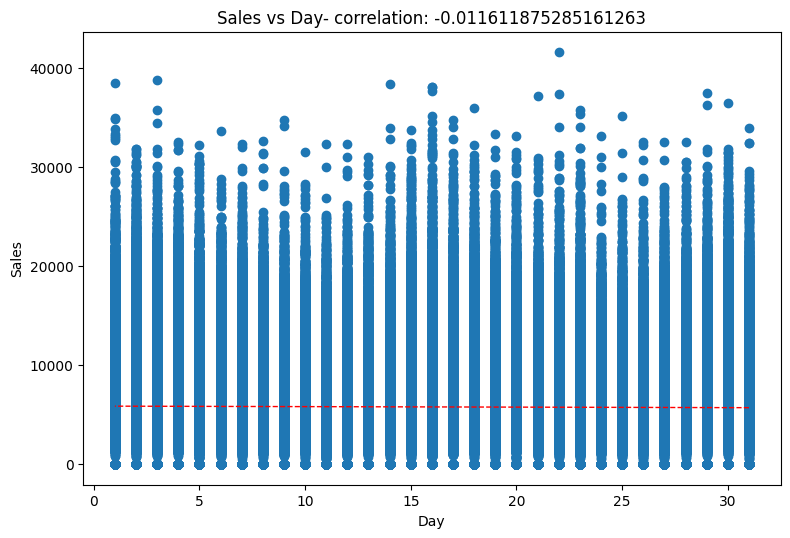

In [ ]:
numeric_features = list(df_new.describe().columns)
     
for col in numeric_features:
  if col not in ['Store','Sales']:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df_new[col]
    label = df_new['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df_new[col], df_new['Sales'], 1)
    y_hat = np.poly1d(z)(df_new[col])

    plt.plot(df_new[col], y_hat, "r--", lw=1)

    

plt.show()

##### 1. Why did you pick the specific chart?

So that we get to known is there any corelation between the all numeric variables and sales and it shows the correlation between both independent and dependent variable.

##### 2. What is/are the insight(s) found from the chart?

As we can see the variables are not normally distributed in these plot and also variables are highly corrrelated like customers and open



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As from the insights we can see that the variables which are highly correlated will create problem ahed in business impact and prediction so we have to clean them up . And it can lead to the negative growth if we get highly dependent on this values .

#### **Chart - 10:Correlation Heatmap**

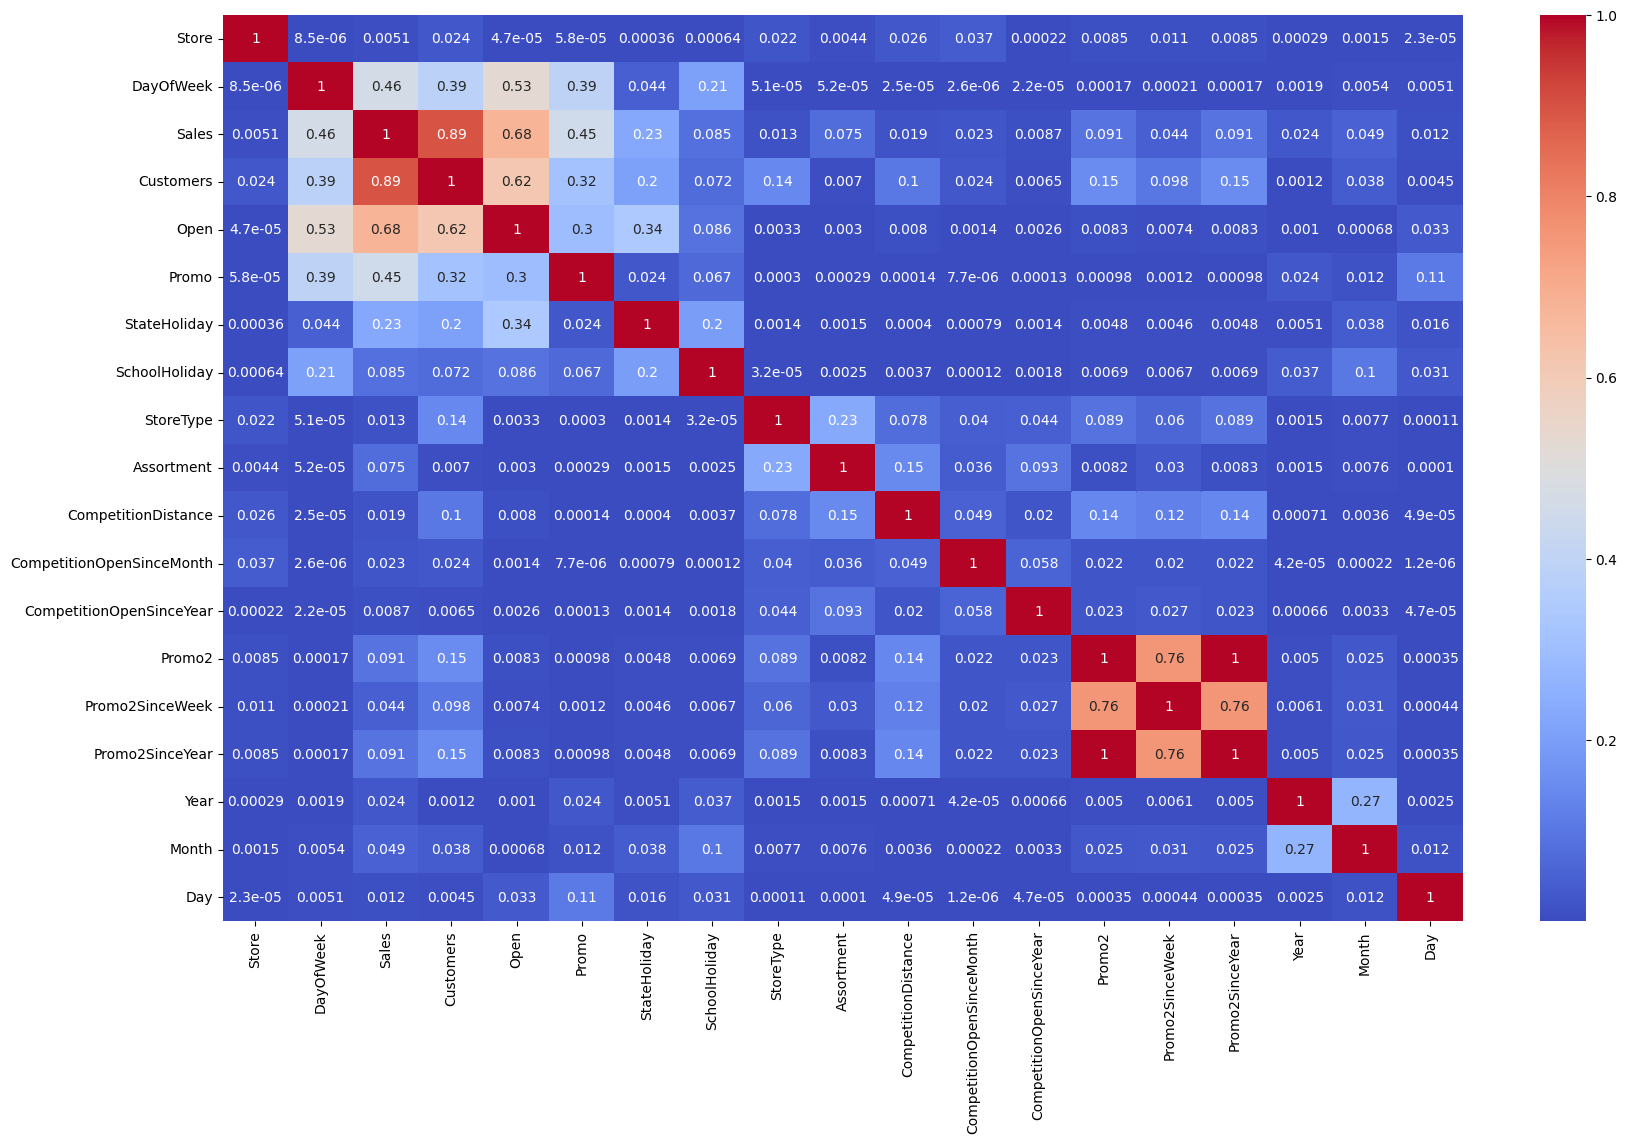

In [ ]:
## Correlation heatmap
plt.figure(figsize=(20,12))
correlation = df_new.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

Here we have used heatmap to find the correlation between all the numeric values and sales.

##### 2. What is/are the insight(s) found from the chart?

As we can see the variables are not normally distributed there is a reason, due to the catogerical variables it happens and so variables are highly corrrelated like customers and open.

SO , From this all charts we can clearly see that the customer is highly correlated (0.89) with our targeted variales that is sales .

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


As from the insights we can see that the variables which are highly correlated will create problem ahead in business impact and in prediction so we have to clean them up . And it can lead to the negative growth if we get highly dependent on this values .

## ***5. Feature Engineering & Data Pre-processing***

In [ ]:
#Creating a copy of the dataset for further feature engineering
DF_new=df_new.copy()

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(DF_new.isnull().sum())

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
Day                          0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

Here we can see that there isno null values in the DF_new dtaset

### 2. Handling Outliers

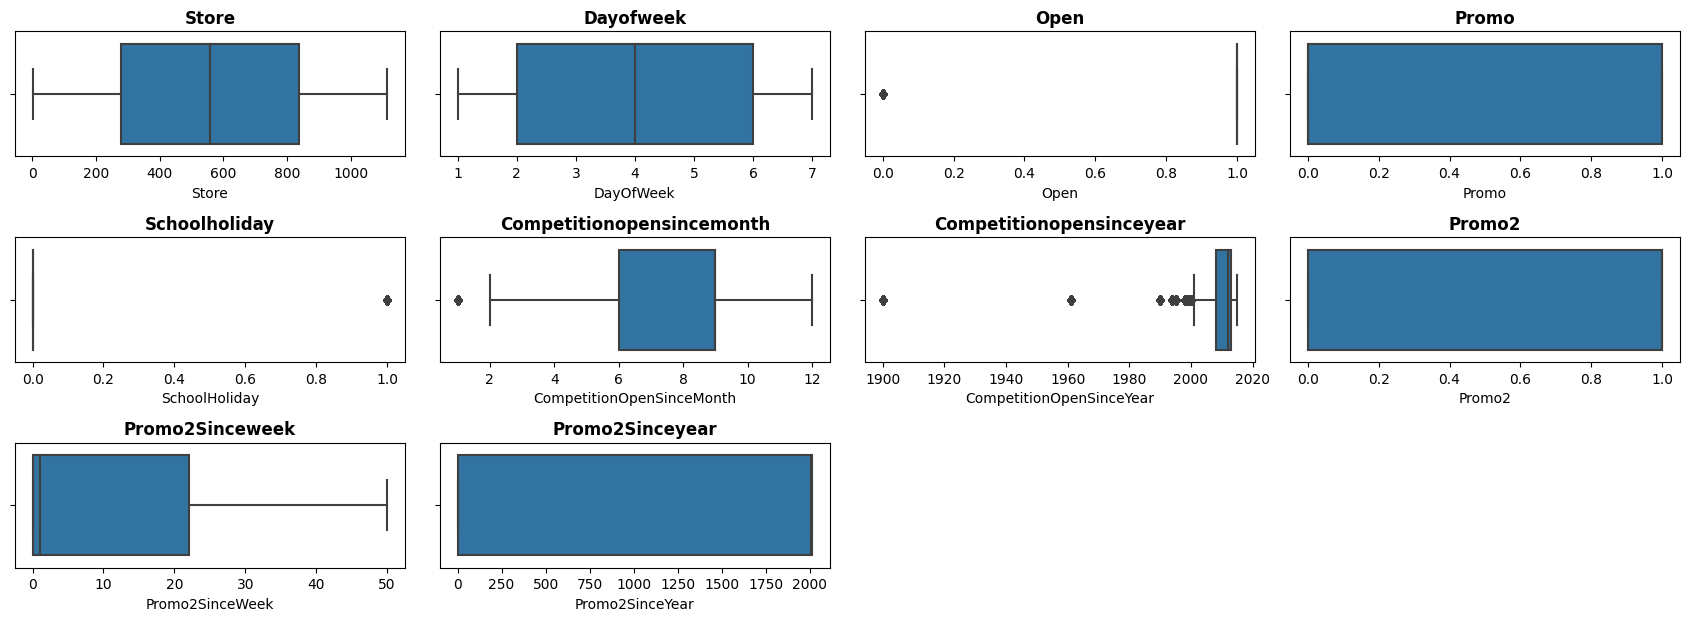

In [ ]:
# Handling Outliers & Outlier treatments
numerical_col=['Store','DayOfWeek','Open','Promo','SchoolHoliday','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear']


plt.figure(figsize=(17,10))
for n,column in enumerate(numerical_col):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

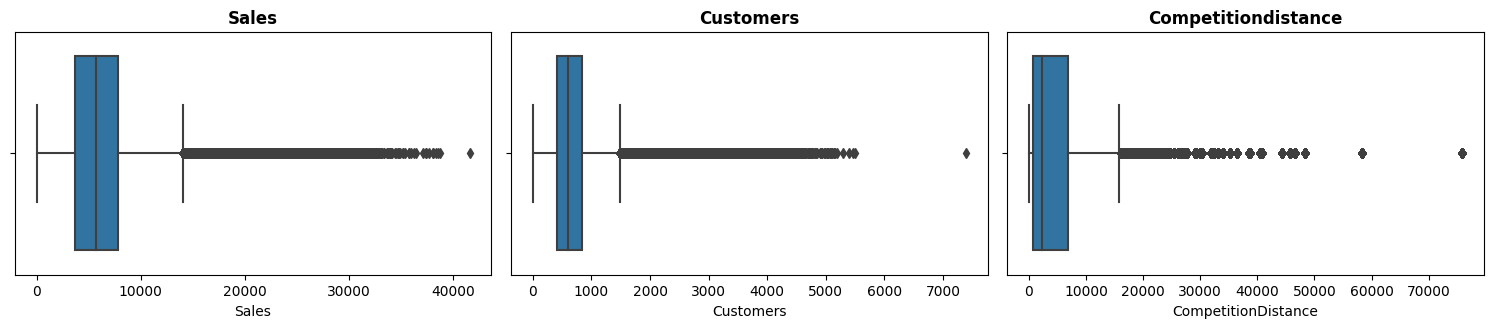

In [ ]:
# Checking outliers for continuous columns

continuous_col=['Sales','Customers','CompetitionDistance']

plt.figure(figsize=(20,15))
for n,column in enumerate(continuous_col):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

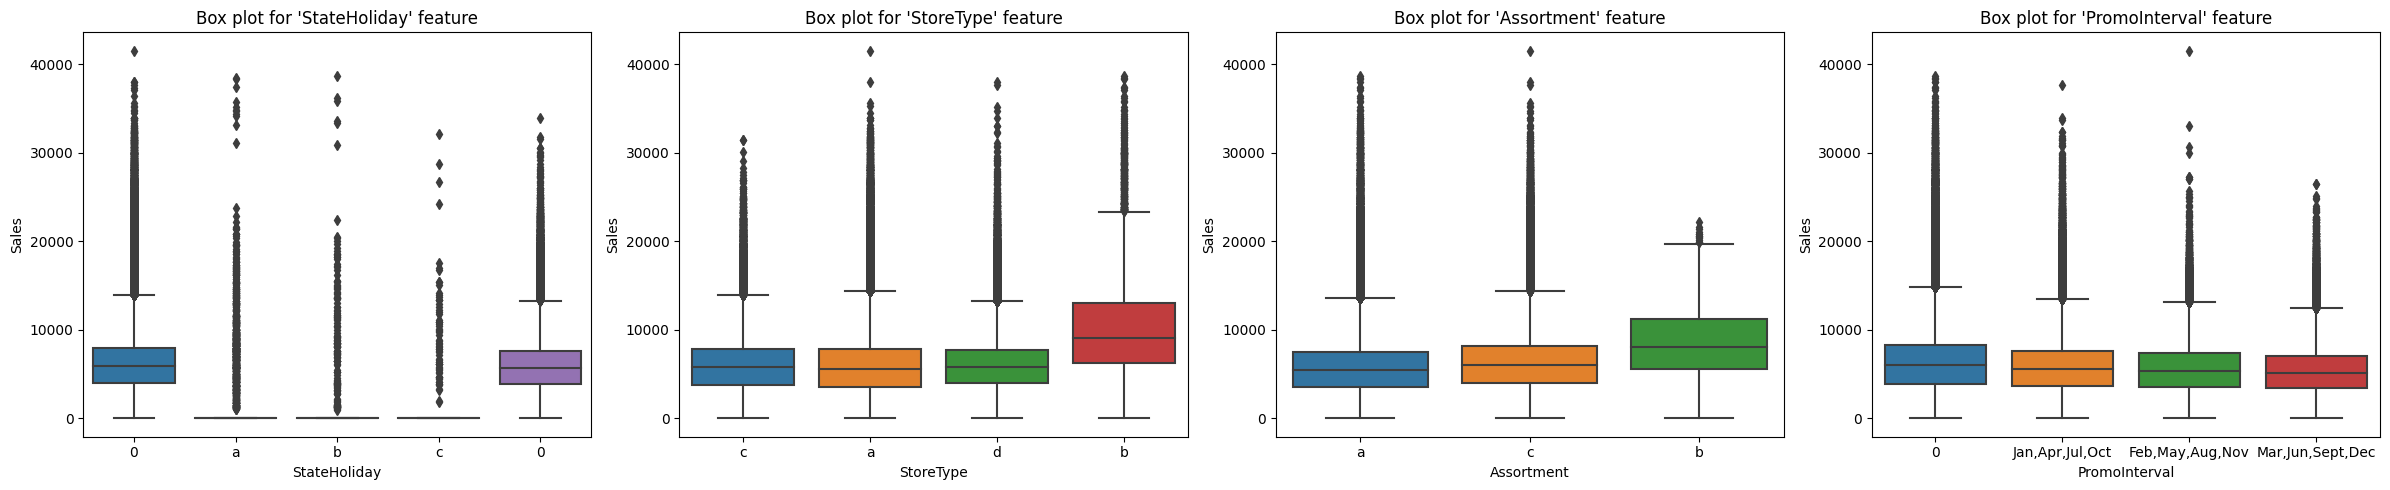

In [ ]:
# Checking outliers for categorical columns

categorical_col=['StateHoliday','StoreType','Assortment','PromoInterval']

plt.figure(figsize=(24,5))
for i,col in enumerate(categorical_col):
  plt.subplot(1,4,i+1)
  sns.boxplot( x = df[col],y = 'Sales', data = df )
  plt.title(f"Box plot for '{col}' feature")
  plt.tight_layout()

In [ ]:
# Knowing the percentage of outliers 

# Let's first make a list of columns of numerical and continuous variables containing outliers
col_containing_outliers = ['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Sales','Customers']

# defining the code for outlier detection and percentage using IQR.
def detect_outliers(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q2 = np.percentile(data, 50)
    q3 = np.percentile(data, 75)
    print(f"q1:{q1}, q2:{q2}, q3:{q3}")

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(f"Lower bound: {lwr_bound}, Upper bound: {upr_bound}, IQR: {IQR}")

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    len_outliers= len(outliers)
    print(f"Total number of outliers are: {len_outliers}")

    print(f"Total percentage of outlier is: {round(len_outliers*100/len(data),2)} %")

# Determining IQR, Lower and Upper bound and number out outliers present in each of the continous numerical feature
for feature in col_containing_outliers:
  print(feature,":")
  detect_outliers(df[feature])
  print("\n")

CompetitionOpenSinceMonth :
q1:6.0, q2:9.0, q3:9.0
Lower bound: 1.5, Upper bound: 13.5, IQR: 3.0
Total number of outliers are: 12452
Total percentage of outlier is: 1.22 %


CompetitionOpenSinceYear :
q1:2008.0, q2:2012.0, q3:2013.0
Lower bound: 2000.5, Upper bound: 2020.5, IQR: 5.0
Total number of outliers are: 27524
Total percentage of outlier is: 2.71 %


Sales :
q1:3727.0, q2:5744.0, q3:7856.0
Lower bound: -2466.5, Upper bound: 14049.5, IQR: 4129.0
Total number of outliers are: 26694
Total percentage of outlier is: 2.62 %


Customers :
q1:405.0, q2:609.0, q3:837.0
Lower bound: -243.0, Upper bound: 1485.0, IQR: 432.0
Total number of outliers are: 38095
Total percentage of outlier is: 3.75 %




In [ ]:
# Defining the function that treats outliers with the IQR technique
def treat_outliers_iqr(data):
    # Calculate the first and third quartiles
    q1, q3 = np.percentile(data, [25, 75])
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Identify the outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    
    # Treat the outliers (e.g., replace with the nearest quartile value)
    treated_data = [q1 if x < lower_bound else q3 if x > upper_bound else x for x in data]
    treated_data_int = [int(absolute) for absolute in treated_data]
    
    return treated_data_int
     

In [ ]:
#Passing all the feature one by one from the list of continous_value_feature in our above defined function for outlier treatment
for feature in col_containing_outliers:
  df[feature]=treat_outliers_iqr(df[feature])

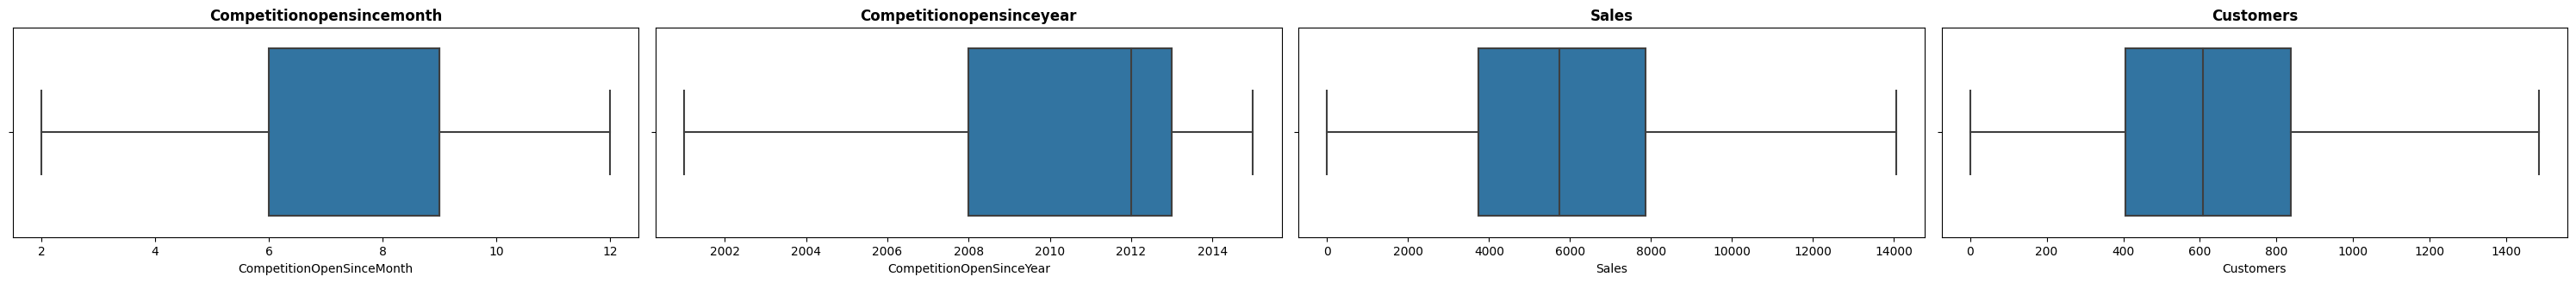

In [ ]:
#Replotting the box plots and rechecking the percentage of outliers still available(if any) in the list of continous_value_feature.
plt.figure(figsize=(30,15))
for n,column in enumerate(col_containing_outliers):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()
     

In [ ]:
# Rechecking the total number of outliers and its percentage present in our dataset.
for feature in col_containing_outliers:
  print(feature,":")
  detect_outliers(df[feature])
  print("\n")

CompetitionOpenSinceMonth :
q1:6.0, q2:9.0, q3:9.0
Lower bound: 1.5, Upper bound: 13.5, IQR: 3.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


CompetitionOpenSinceYear :
q1:2008.0, q2:2012.0, q3:2013.0
Lower bound: 2000.5, Upper bound: 2020.5, IQR: 5.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Sales :
q1:3727.0, q2:5744.0, q3:7856.0
Lower bound: -2466.5, Upper bound: 14049.5, IQR: 4129.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Customers :
q1:405.0, q2:609.0, q3:837.0
Lower bound: -243.0, Upper bound: 1485.0, IQR: 432.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %




##### What all outlier treatment techniques have you used and why did you use those techniques?

There are several outliers in numerical , continuous and categorical columuns .
First we will check the outlier of these cilumns and remove those by IQR

( Interquartile range )method .


### 3. Categorical Encoding



In our dataframe , categorical columns are ' StateHoliday ' , ' StoreType ' , ' Assortment ' and ' PromoInterval ' .

StateHoliday ------>>> Ordinal data

StoreType -------->>> Nominal Data

Assortment ------->>> Ordinal Data

PromoInterval ---->>> Nominal Data

In [ ]:
# Encode your categorical columns
for unique in categorical_col:
  print(f"{unique}: ")
  print(f"The unique values are: {df[unique].unique()}")
  print(f"Total number of unique values are: {df[unique].nunique()}")
  print("\n")

StateHoliday: 
The unique values are: ['0' 'a' 'b' 'c' 0]
Total number of unique values are: 5


StoreType: 
The unique values are: ['c' 'a' 'd' 'b']
Total number of unique values are: 4


Assortment: 
The unique values are: ['a' 'c' 'b']
Total number of unique values are: 3


PromoInterval: 
The unique values are: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
Total number of unique values are: 4




In [ ]:
# Creating dummies for our categorical columns 
Df_new=pd.get_dummies(DF_new,columns=['StoreType','Assortment','PromoInterval'],dtype=int,drop_first=True)

# code to see all the features
pd.set_option('display.max_columns', None)

# Let's see first five observations of our dataset
Df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,StoreType_1,StoreType_2,StoreType_3,Assortment_1,Assortment_2,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,1270,9,2008,0,0,0,2015,7,31,0,1,0,0,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,570,11,2007,1,13,2010,2015,7,31,0,0,0,0,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,14130,12,2006,1,14,2011,2015,7,31,0,0,0,0,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,620,9,2009,0,0,0,2015,7,31,0,1,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,29910,4,2015,0,0,0,2015,7,31,0,0,0,0,0,0,0,0


### 4. Feature Manipulation & Selection

**1. Feature Manipulation**

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
Df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,StoreType_1,StoreType_2,StoreType_3,Assortment_1,Assortment_2,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,1270,9,2008,0,0,0,2015,7,31,0,1,0,0,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,570,11,2007,1,13,2010,2015,7,31,0,0,0,0,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,14130,12,2006,1,14,2011,2015,7,31,0,0,0,0,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,620,9,2009,0,0,0,2015,7,31,0,1,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,29910,4,2015,0,0,0,2015,7,31,0,0,0,0,0,0,0,0


In [ ]:
#Dropping the Date feature the dataset as we have gained data,year and month from it.
Df_new.drop(columns=["Date"],inplace=True,axis=1)

In [ ]:
Df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                          Non-Null Count    Dtype
---  ------                          --------------    -----
 0   Store                           1017209 non-null  int64
 1   DayOfWeek                       1017209 non-null  int64
 2   Sales                           1017209 non-null  int64
 3   Customers                       1017209 non-null  int64
 4   Open                            1017209 non-null  int64
 5   Promo                           1017209 non-null  int64
 6   StateHoliday                    1017209 non-null  int64
 7   SchoolHoliday                   1017209 non-null  int64
 8   CompetitionDistance             1017209 non-null  int64
 9   CompetitionOpenSinceMonth       1017209 non-null  int64
 10  CompetitionOpenSinceYear        1017209 non-null  int64
 11  Promo2                          1017209 non-null  int64
 12  Promo2SinceWeek             

**2.Feature Selection**

In [ ]:
# Select your features wisely to avoid overfitting

In [ ]:
Df_new[(Df_new['Open'] == 0) & (Df_new['Sales'] == 0)].count()[0]
     

172817

In [ ]:
final_df = Df_new.drop(Df_new[(Df_new['Open'] == 0) & (Df_new['Sales'] == 0)].index)

Here we have have removed the zeros in open and sales columns ,because when the value of open is zero it means that the store is closed and sales zero means there is no sales ,so we have removed those which has value zero in open and sales features

In [ ]:
final_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,StoreType_1,StoreType_2,StoreType_3,Assortment_1,Assortment_2,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,5263,555,1,1,0,1,1270,9,2008,0,0,0,2015,7,31,0,1,0,0,0,0,0,0
1,2,5,6064,625,1,1,0,1,570,11,2007,1,13,2010,2015,7,31,0,0,0,0,0,0,1,0
2,3,5,8314,821,1,1,0,1,14130,12,2006,1,14,2011,2015,7,31,0,0,0,0,0,0,1,0
3,4,5,13995,1498,1,1,0,1,620,9,2009,0,0,0,2015,7,31,0,1,0,0,1,0,0,0
4,5,5,4822,559,1,1,0,1,29910,4,2015,0,0,0,2015,7,31,0,0,0,0,0,0,0,0


In [ ]:
final_df.dtypes

Store                             int64
DayOfWeek                         int64
Sales                             int64
Customers                         int64
Open                              int64
Promo                             int64
StateHoliday                      int64
SchoolHoliday                     int64
CompetitionDistance               int64
CompetitionOpenSinceMonth         int64
CompetitionOpenSinceYear          int64
Promo2                            int64
Promo2SinceWeek                   int64
Promo2SinceYear                   int64
Year                              int64
Month                             int64
Day                               int64
StoreType_1                       int64
StoreType_2                       int64
StoreType_3                       int64
Assortment_1                      int64
Assortment_2                      int64
PromoInterval_Feb,May,Aug,Nov     int64
PromoInterval_Jan,Apr,Jul,Oct     int64
PromoInterval_Mar,Jun,Sept,Dec    int64


**3.Checking Multicollinearity**

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(final_df[[i for i in final_df.describe().columns if i not in ["Store", "Sales"]]])

,variables,VIF
0,DayOfWeek,1.120005e+00
1,Customers,1.484056e+00
2,Open,7.390478e+06
3,Promo,1.153978e+00
4,StateHoliday,1.016206e+00
5,SchoolHoliday,1.036375e+00
6,CompetitionDistance,1.104809e+00
7,CompetitionOpenSinceMonth,1.024066e+00
8,CompetitionOpenSinceYear,1.018139e+00
9,Promo2,inf


In [ ]:
calc_vif(final_df[[i for i in final_df.describe().columns if i not in ["Store", "Sales","Promo2SinceYear	"]]])

,variables,VIF
0,DayOfWeek,1.120005e+00
1,Customers,1.484056e+00
2,Open,7.390478e+06
3,Promo,1.153978e+00
4,StateHoliday,1.016206e+00
5,SchoolHoliday,1.036375e+00
6,CompetitionDistance,1.104809e+00
7,CompetitionOpenSinceMonth,1.024066e+00
8,CompetitionOpenSinceYear,1.018139e+00
9,Promo2,inf


Here the vif of Promo2SinceYear	is 8 which high compared to the other which comes under 3.


Here now the VIF is less than 3 which is quite good

##### What all feature selection methods have you used  and why?

Here to check the multicollinearity between the input variables we have used VIF(Variation Inflation factor)

**5.Data Transformation**

Now lets check the distribution of other features


In our final dataframe , continuous columns are Sales , Customers , Competitiondistance .

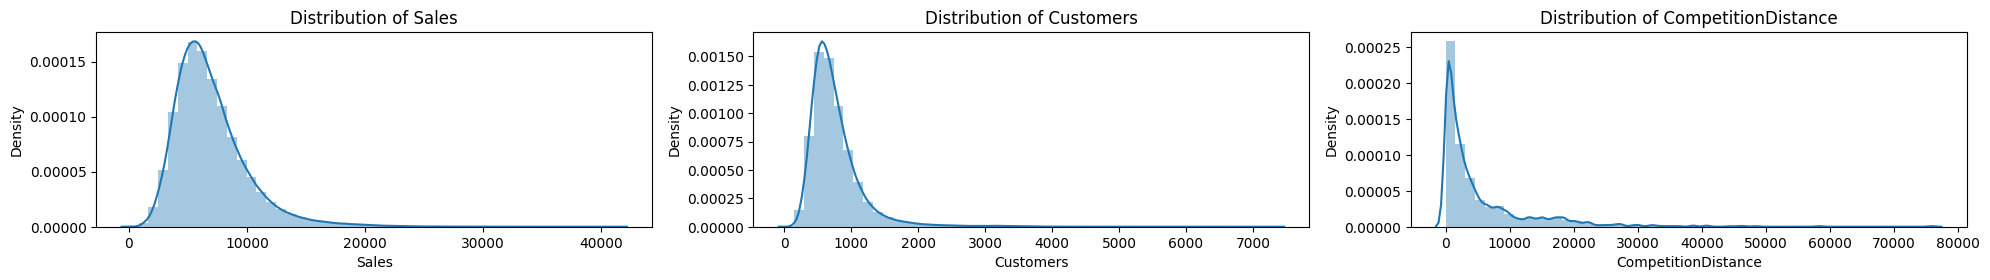

In [ ]:
#here we will create a variable for the continues features
continuous_features=['Sales','Customers','CompetitionDistance']
#checking distribution before transformation
plt.figure(figsize=(20,5))
for n,col in enumerate(continuous_features):
  plt.subplot(2,3,n+1)
  sns.distplot(final_df[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

In [ ]:
# Applying transformation on the continuous features
final_df['Sales']=np.sqrt(final_df['Sales'])
final_df['Customers']=np.sqrt(final_df['Customers'])
final_df['CompetitionDistance']=np.log1p(final_df['CompetitionDistance'])

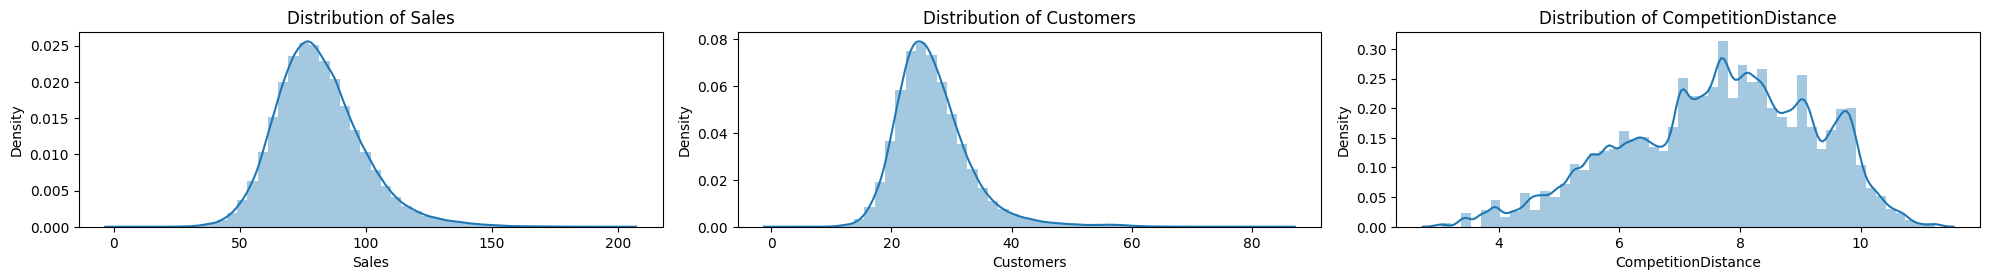

In [ ]:
# Viewing the distribution above of above columns after applying transformation 
plt.figure(figsize=(20,5))
for n,col in enumerate(continuous_features):
  plt.subplot(2,3,n+1)
  sns.distplot(final_df[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()


#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Here we have transformation techniques on the continuous fratures sales,customers and competitiondistance and after the applying transformation they are normally distributed.

**6.Data Scaling**

We will  be scaling the daya to standardize the independent variable  in our final dataframe.

In [ ]:
from sklearn.preprocessing import StandardScaler
# Scaling our final dataframe
scaler = StandardScaler()
scaler = scaler.fit(final_df)

**7.Data Splitting**

In [ ]:
#Defining Independent variables
X=final_df[['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'Year', 'Month', 'Day',
       'StoreType_1', 'StoreType_2', 'StoreType_3', 'Assortment_1',
       'Assortment_2', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec']]
#Defining Dependent Variables
Y=final_df[['Sales']]

Before, fitting any model it is a rule  to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data known as testing data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but usually it is 80:20.

In [ ]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(675513, 24)
(168879, 24)


In [ ]:
# fittinng the scaler to the train set 
scaler.fit(X_train)
# transforming train and test sets 
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
     

## ***7. ML Model Implementation***

**ML Model 1-Implementing Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)

In [ ]:
reg.score(X_train, Y_train)

0.8648631640599871

In [ ]:
reg.coef_

array([[-1.49612210e-01, -1.86126029e-01,  1.71241013e+01,
        -4.26025299e+09,  3.00483923e+00,  6.11889077e-02,
         6.66391077e-02,  2.44505669e+00, -8.66764946e-02,
        -1.73034636e-01, -1.11000645e+13,  7.32736772e-01,
        -2.90889952e+02,  8.07902335e-01,  6.00890826e-01,
         7.09797858e-02, -1.86970675e+00, -3.15545965e-01,
         3.10256896e+00, -2.02841848e+00,  7.42930556e-01,
         7.11062664e+12,  1.00398692e+13,  6.52793489e+12]])

In [ ]:
reg.intercept_

array([81.55507204])

In [ ]:
y_pred_test = reg.predict(X_test)

In [ ]:
y_pred_test


array([[74.18397829],
       [68.16640016],
       [89.97694704],
       ...,
       [61.32240602],
       [92.41029665],
       [76.2267029 ]])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score as r2
#evalution Matrix
MSE  = mean_squared_error(Y_test,y_pred_test)
print("MSE_LR :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE_LR :" ,RMSE)

R2_score_LR=r2(Y_test, y_pred_test)
print("R2_score_LR :" ,R2_score_LR)

MSE_LR : 41.02153201324163
RMSE_LR : 6.4048053844938675
R2_score_LR : 0.8651515712531268


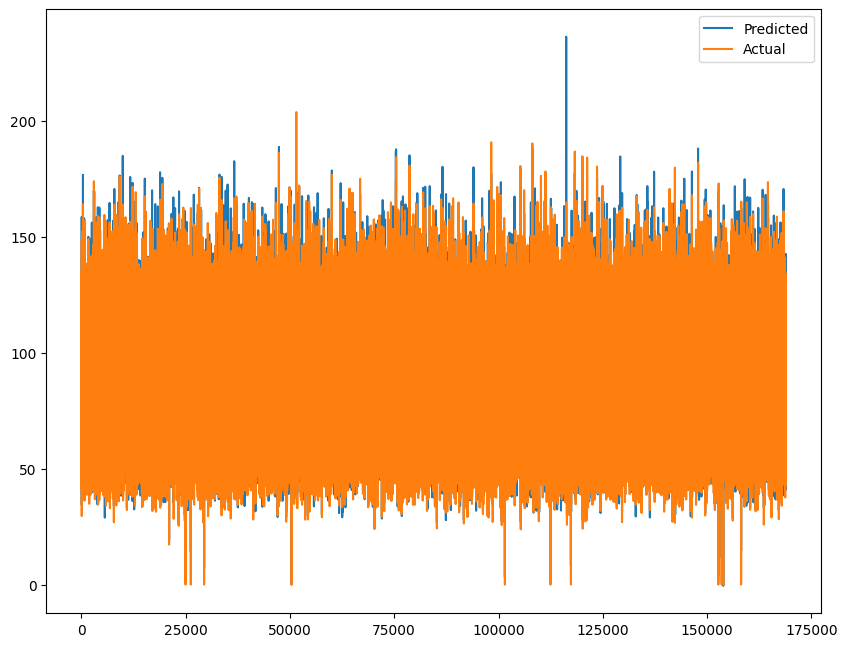

In [ ]:
#Plot between actual and predicted
plt.figure(figsize=(10,8))
plt.plot(y_pred_test)
plt.plot(np.array(Y_test))
plt.legend(["Predicted","Actual"])
plt.show()

**ML Model 2-Implementing Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(X_train, Y_train)

Lasso(alpha=0.1, max_iter=3000)

In [ ]:
lasso.score(X_train, Y_train)

0.8639139398324713

In [ ]:
y_pred_lasso = lasso.predict(X_test)

In [ ]:
y_pred_lasso

array([73.31194619, 68.80736272, 88.80774198, ..., 61.54569268,
       91.52844434, 75.65813991])

In [ ]:
#Evalution Matrix
MSE = mean_squared_error(Y_test, y_pred_lasso)
print("MSE_lasso :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE_lasso :" ,RMSE)

R2_score_lasso = r2(Y_test, y_pred_lasso)
print("R2_score_lasso :", R2_score_lasso)


MSE_lasso : 41.305146245823096
RMSE_lasso : 6.426907984857345
R2_score_lasso : 0.8642192576178994


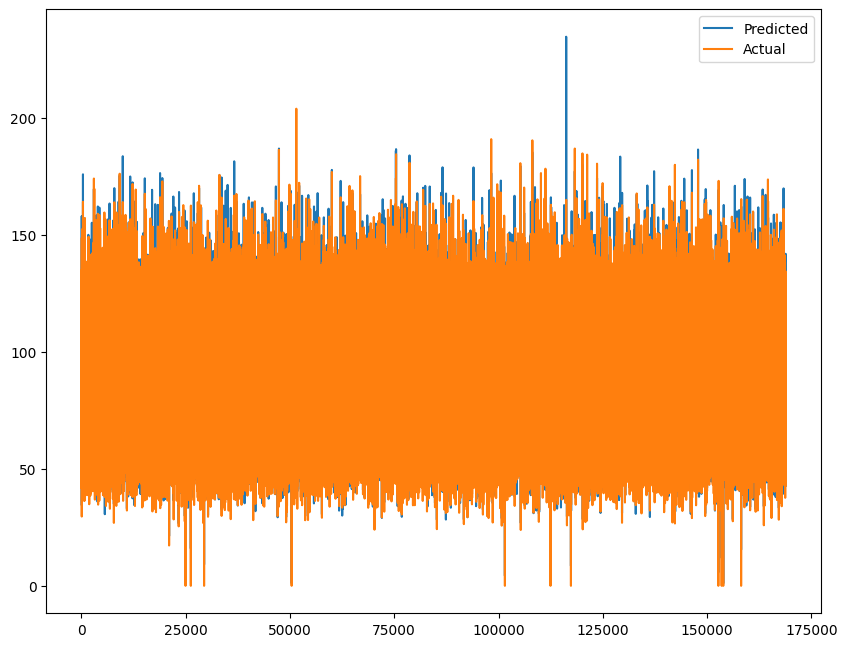

In [ ]:
#Plot between actual and predicted 
plt.figure(figsize=(10,8))
plt.plot(y_pred_lasso)
plt.plot(np.array(Y_test))
plt.legend(["Predicted","Actual"])
plt.show()

**Running Grid Search Cross Validation for Lasso Regression**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -41.402817812302544


In [ ]:
y_pred_lasso_gc = lasso_regressor.predict(X_test)

In [ ]:
#Evalution Matrix
MSE  = mean_squared_error(Y_test,y_pred_lasso_gc)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_score = r2(Y_test, y_pred_lasso_gc)
print("R2 :" ,r2)

MSE : 41.13232088746533
RMSE : 6.413448439604495
R2 : 0.8647873794524188


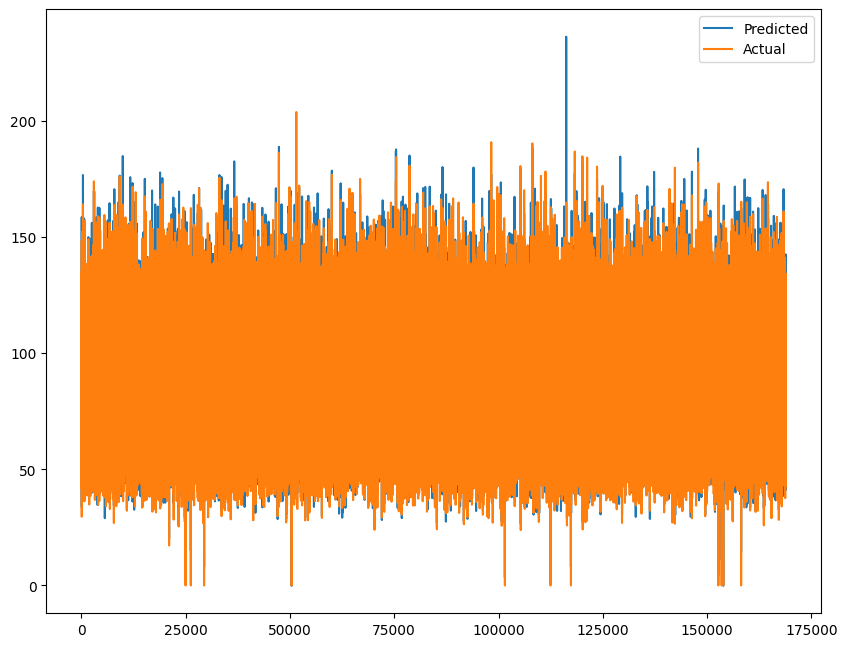

In [ ]:
#Plot between actual and predicted 
plt.figure(figsize=(10,8))
plt.plot(y_pred_lasso_gc)
plt.plot(np.array(Y_test))
plt.legend(["Predicted","Actual"])
plt.show()

**ML Model 3-Implementing Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)

In [ ]:
ridge.fit(X_train,Y_train)

Ridge(alpha=0.1)

In [ ]:
ridge.score(X_train, Y_train)

0.8648547314213213

In [ ]:
y_pred_ridge = ridge.predict(X_test)
y_pred_ridge

array([[74.10521643],
       [68.22034029],
       [89.92885631],
       ...,
       [61.36960839],
       [92.28153786],
       [76.17247698]])

In [ ]:
#Evalution Matrix
MSE  = mean_squared_error(Y_test,y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

R2_score_ridge  = r2(Y_test, y_pred_ridge)
print("R2_score_ridge :" ,R2_score_ridge )

MSE : 41.025982706117546
RMSE : 6.4051528245716
R2_score_ridge : 0.8651369406698283


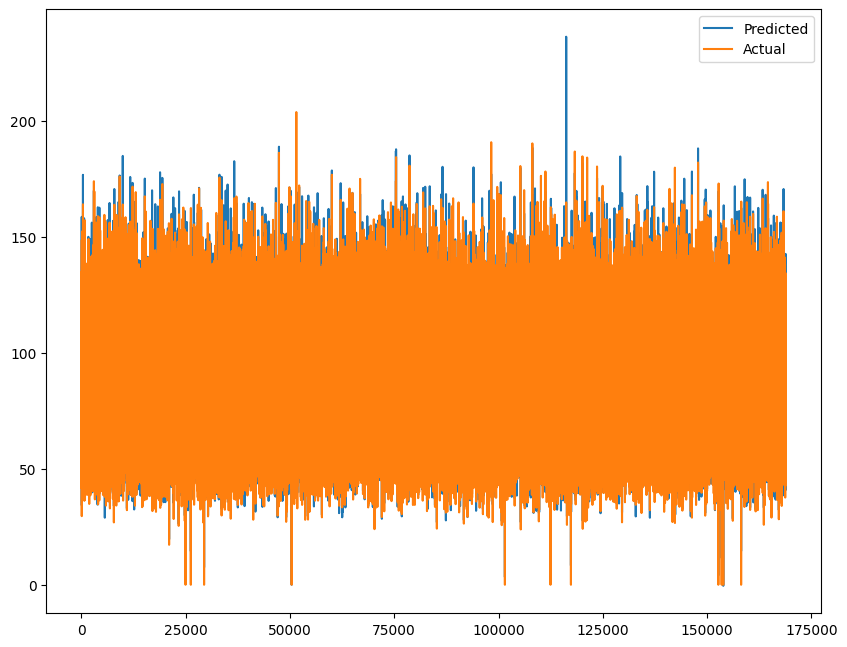

In [ ]:
#Plot between actual and predicted 
plt.figure(figsize=(10,8))
plt.plot(y_pred_ridge)
plt.plot(np.array(Y_test))
plt.legend(["Predicted","Actual"])
plt.show()

**Running Grid Search Cross Validation for Ridge Regression**

In [ ]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -41.29932823543553


In [ ]:
y_pred_ridge_gc = ridge_regressor.predict(X_test)

In [ ]:
#Evalution Matrix
MSE  = mean_squared_error(Y_test,y_pred_ridge_gc)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_score = r2(Y_test, y_pred_ridge_gc)
print("R2 :" ,r2_score)

MSE : 41.02223927744785
RMSE : 6.40486059781537
R2 : 0.8651492462920092


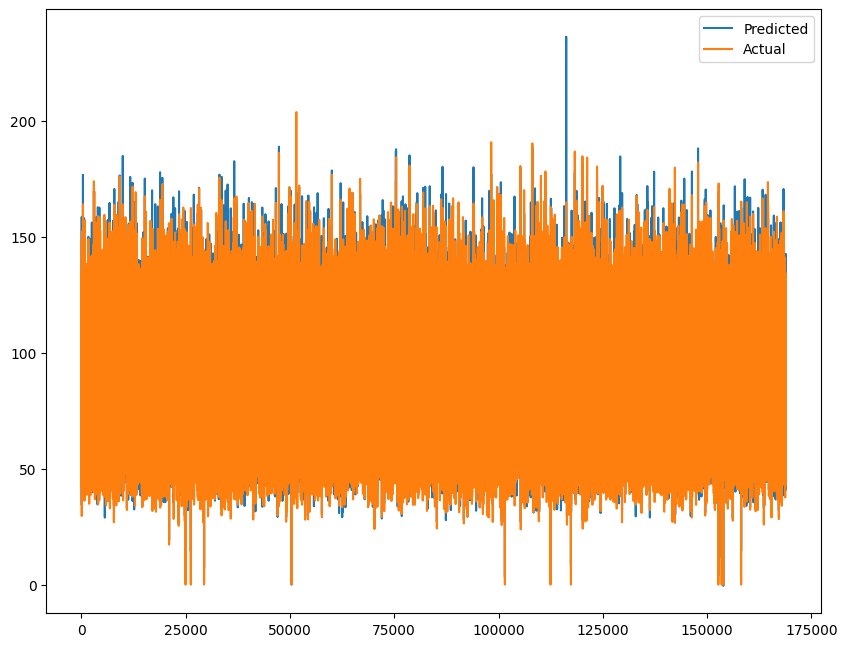

In [ ]:
#Plot between actual and predicted 
plt.figure(figsize=(10,8))
plt.plot(y_pred_ridge_gc)
plt.plot(np.array(Y_test))
plt.legend(["Predicted","Actual"])
plt.show()

**ML Model 4-Implementing Elasticnet Regression**

In [ ]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,Y_train)

ElasticNet(alpha=0.1)

In [ ]:
elasticnet.score(X_train, Y_train)

0.8599797801968858

In [ ]:
y_pred_en = elasticnet.predict(X_test)

In [ ]:
#Evalution Matrix
MSE  = mean_squared_error(Y_test,y_pred_en)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

R2_score_EN = r2(Y_test, y_pred_en)
print("R2_score_EN :" ,R2_score_EN)

MSE : 42.45042040071563
RMSE : 6.515398713871288
R2_score_EN : 0.8604544440506781


**Running Grid Search Cross Validation for ELastic Net Regression**

In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=3)
elastic_regressor.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15, 'l1_ratio': 0.3}

Using  {'alpha': 1e-15, 'l1_ratio': 0.3}  the negative mean squared error is:  -41.402817812302544


In [ ]:
y_pred_en_gc = elastic_regressor.predict(X_test)

In [ ]:
#Evalution Matrix
MSE  = mean_squared_error(Y_test,y_pred_en_gc)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_score= r2(Y_test, y_pred_en)
print("R2 :" ,r2_score)

MSE : 41.132320887465326
RMSE : 6.413448439604495
R2 : 0.8604544440506781


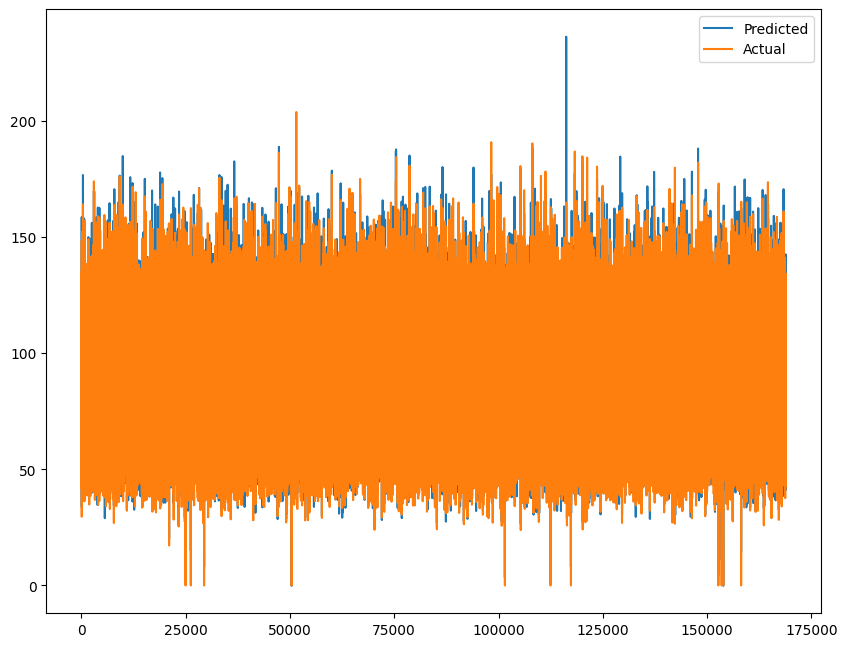

In [ ]:
#Plot between actual and predicted 
plt.figure(figsize=(10,8))
plt.plot(y_pred_en_gc)
plt.plot(np.array(Y_test))
plt.legend(["Predicted","Actual"])
plt.show()

**ML Model 5-Implementing Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# DecisionTreeRefressor
Decision_tree = DecisionTreeRegressor()
Decision_tree_reg = Decision_tree.fit(X_train, Y_train)

In [ ]:
y_pred_test_dt=Decision_tree.predict(X_test)

In [ ]:
#Evalution Matrix
MSE  = mean_squared_error(Y_test,y_pred_test_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

R2_score_DT = r2(Y_test, y_pred_test_dt)
print("R2_score_DT :" ,R2_score_DT)

MSE : 13.56259184557514
RMSE : 3.682742435410755
R2_score_DT : 0.9554162384885918


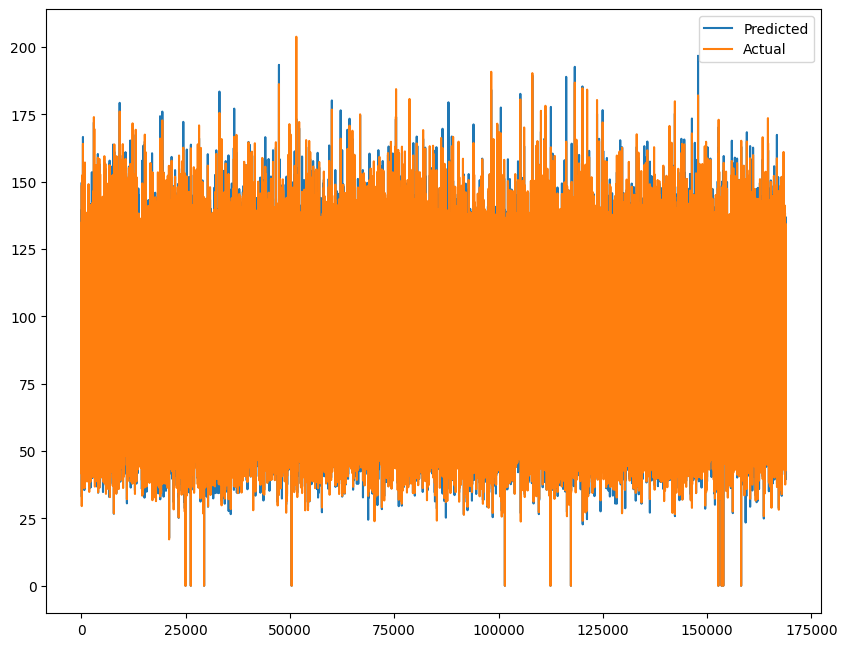

In [ ]:
#Plot between actual and predicted 
plt.figure(figsize=(10,8))
plt.plot(y_pred_test_dt)
plt.plot(np.array(Y_test))
plt.legend(["Predicted","Actual"])
plt.show()

 Here our r2 score value is 0.95 that means our model is able to capture almost all of the data variance.so we will not be doing GridSearch Cross Validation here.

**ML Model 6-Implementing Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
random_forest_model = RandomForestRegressor(n_estimators=50, criterion='squared_error',random_state=1)
random_forest_reg = random_forest_model.fit(X_train, Y_train)

In [ ]:
y_pred_test_rf= random_forest_model.predict(X_test)

In [ ]:
#Evalution Matrix
MSE  = mean_squared_error(Y_test,y_pred_test_rf)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

R2_score_RF = r2(Y_test, y_pred_test_rf)
print("R2_score_RF :" ,R2_score_RF)

MSE : 6.641555157307759
RMSE : 2.577121486718808
R2_score_RF : 0.9781674834301765


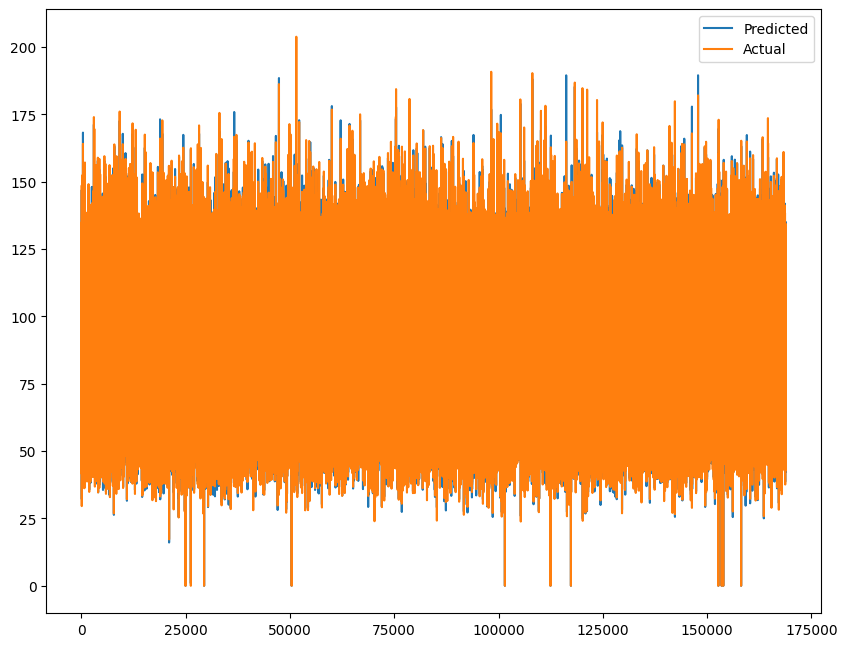

In [ ]:
#Plot between actual and predicted 
plt.figure(figsize=(10,8))
plt.plot(y_pred_test_rf)
plt.plot(np.array(Y_test))
plt.legend(["Predicted","Actual"])
plt.show()

**ML Model 7-Implementing XGBOOST**

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=50, criterion='squared_error',random_state=1)

In [ ]:
xgb_reg=xgb.fit(X_train, Y_train)

[09:43:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_pred_test_xgb= xgb.predict(X_test)

In [ ]:
#Evalution Matrix
MSE  = mean_squared_error(Y_test,y_pred_test_xgb)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

R2_score_XGB = r2(Y_test, y_pred_test_xgb)
print("R2_score_XGB :" ,R2_score_XGB)

MSE : 39.60215961948562
RMSE : 6.293024679713692
R2_score_XGB : 0.8698174169129842


In [ ]:
#Comparison between the models
r2_Score_df = pd.DataFrame({'Regressions':['LinearRegression','LassoRegression','RidgeRegresion', 'ElasticNet','DecisionTree', 'RandomForest','XGBoost'],'R2_Score':[R2_score_LR,R2_score_lasso,R2_score_ridge,R2_score_EN,R2_score_DT,R2_score_RF,R2_score_XGB]})

In [ ]:
r2_Score_df

,Regressions,R2_Score
0,LinearRegression,0.865152
1,LassoRegression,0.864219
2,RidgeRegresion,0.865137
3,ElasticNet,0.860454
4,DecisionTree,0.955416
5,RandomForest,0.978167
6,XGBoost,0.869817


# **Conclusions From EDA:**

There are 2 datasets - 1)Rossmann.csv & 2)store.csv

Shape of Rossmann dataset = (1017209,8) shape of store dataset = (1115,10)

On looking on datasets we find lots of NAN values in store dataset.We replaced those null values with mode and meadian and also we have changed certain datatypes to int so we can perform linear regression.

We also did some graphs analysis and we got are:

1.The Plot between sales and competitionsinceyear shows that Sales are high during the year 1900, as there are very few store were operated of Rossmann so there is less competition and sales are high.

2.The Plot between sales and Promo2sinceyear shows that Promo2 has very good effect on sales but in year 2013 sales be minimum and also in year 2012 and 2015 sales are very low.

3.From the Plot between sales and competitionopensincemonth it is very clear that in December month due to Christmas Eve and New year celebration everone is buying. So sales of Rossmann store is very high in December.

4.From the Plot between Sales and Days of week shows that maximum sales is on Monday and sales gradually decreasing to 6th day of week i.e. on Saturday. It also shows that sales on Sunday is almost near to zero as on sunday maximum stores are closed.

5.The Barplot between promo and Sales shows the effect of promotion on Sales. Here 0 represents the store which didnt opt for promotion and 1 represents for stores who opt for promotion. Those store who took promotions has high sales as compared to stores who didnt took promotion.

6.We can observe that most of the stores remain closed during State and SchoolHolidays. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays.

7.To determine different store type we have used piechart.Here 'a' type has the maximum distribution with 54.0% and rest b=31.2%,c=13.3% and d with mimnimum of 1.5%.

8.So from the graph we get to known the realtionship between the Assortment and sales and see that which Assortment type does give good result .Here assortment type1 has the highest sales and type2 with least.

9.As we can see the variables are not normally distributed in these plot and also variables are highly corrrelated like customers and open
 
10.As we can see the variables are not normally distributed  there is a reason, due to the catogerical variables it  happens and so variables are highly corrrelated like customers and open.

So From this all charts we can clearly see that the customer is highly correlated (0.89) with our targeted variales that is sales .







## **Conclusion From Model Training**

During the Model Implementation we have  implemented 7 machine learning algorithms Linear Regression,lasso,ridge,Done Grid Search and Hyperparameter Tuning on lasso and ridge and Elastinet,elasticnet,decission tree, Random Forest and XGBoost.

From the Model Implementation we can conclude that,

1.The R Squared score of all Liner Regression Algorithm with or without Regularization are quit good which is 0.86.

2.The R Squared score of elastinet and XGBoost  is also 0.86 which is also very good.

3.The R Squared score of Decision tree is 0.95 which is really good.

4.The Random Forest regressor model performed 0.97 which is very well among the others 7 models. We can say that random forest regressor model is our optimal model and can be deployed.